#### UBER SUPPLY DEMAND GAP : 

##### Business Objectives

- The aim of analysis is to identify the root cause of the problem (i.e. cancellation and non-availability of cars) and recommend ways to improve the situation. As a result of your analysis, you should be able to present to the client the root cause(s) and possible hypotheses of the problem(s) and recommend ways to improve them.

##### Results Expected
1. Visually identify the most pressing problems for Uber. 
Hint: Create plots to visualise the frequency of requests that get cancelled or show 'no cars available'; identify the most problematic types of requests (city to airport / airport to city etc.) and the time slots (early mornings, late evenings etc.) using plots
2. Find out the gap between supply and demand and show the same using plots.
3. Find the time slots when the highest gap exists
4. Find the types of requests (city-airport or airport-city) for which the gap is the most severe in the identified time slots
5. What do you think is the reason for this issue for the supply-demand gap? Write the answer in less than 100 words. You may accompany the write-up with plot(s).
6. Recommend some ways to resolve the supply-demand gap.


#### Reading and Understanding the Data : 

In [1]:
#importing the libraries 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import datetime

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset 
uber_df=pd.read_csv('Uber Request Data.csv')
uber_df.head()

Request id Pickup point  Driver id          Status    Request timestamp  \
0         619      Airport        1.0  Trip Completed      11/7/2016 11:51   
1         867      Airport        1.0  Trip Completed      11/7/2016 17:57   
2        1807         City        1.0  Trip Completed       12/7/2016 9:17   
3        2532      Airport        1.0  Trip Completed      12/7/2016 21:08   
4        3112         City        1.0  Trip Completed  13-07-2016 08:33:16   

        Drop timestamp  
0      11/7/2016 13:00  
1      11/7/2016 18:47  
2       12/7/2016 9:58  
3      12/7/2016 22:03  
4  13-07-2016 09:25:47

In [3]:
# Basic information about the dataset 
# creating a function to display all the basic information about the dataset 

def basic_info(df):
    #shape of the dataset(rows x columns)
    print("\nShape of the dataset : \n",df.shape)
    print("\nOverview of dataset : ")
    print(df.info())
    print('\nDatatypes of columns : \n',df.dtypes.sort_values().groupby(df.dtypes).apply(lambda x:"[%s]"%','.join(x.index)))
    print('\nDescribing each numeric columns : \n',df.describe(exclude=['object']))
    print('\nDescribing each categorical columns : \n',df.describe(include=['object']))
basic_info(uber_df)


Shape of the dataset : 
 (6745, 6)

Overview of dataset : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB
None

Datatypes of columns : 
 int64                                           [Request id]
float64                                          [Driver id]
object     [Pickup point,Status,Request timestamp,Drop ti...
dtype: object

Describing each numeric columns : 
         Request id    Driver id
count  6745.000000  4095.000000
mean   3384.644922   149.501343
std    1955.099667    86.051994
min       1.000000     1.000000
25%    1691.000000    75.000000
50%    3387.000000   149.000000
75%    5080.000000   224.0000

##### Inference : 
- About this Dataset : 
    1. This dataset has 6745 data entries and 6 features which includes Request id of the customer request,Pickup point,Driver id,Status of the trip,Request timestamp and Drop timestamp.
    2. There are some missing values in the dataset in features such as driver id and drop timestamp.
    3. On seeing the values in each columns we shall see that pickup point has two points i.e from city and from airport where majority of pickup point in the dataset is from city. The status of the trip has 3 unique values where trip completed status is in high number in this dataset.

#### Data Quality Check : 

In [4]:
def missing_values_checker(df,cutoff):
    print('Check for NULL/NaN values in each columns :\n')
    null_percent=round(df.isnull().sum()/len(df)*100,2)
    null_percent=null_percent.sort_values(ascending=False).where(null_percent>cutoff)
    print(null_percent[~null_percent.isnull()])

def duplicate_columns(df):
    duplicate_cols=[]
    for i in range(df.shape[1]):
        curr=df.iloc[:,i]
        for j in range(i+1,df.shape[1]):
            cols=df.iloc[:,j]
            if (curr.equals(cols)):
                duplicate_cols.append(df.columns[j])
    print('\nNumber of duplicate columns :',len(duplicate_cols))
    print('\n Duplicate columns to be dropped are :\n',duplicate_cols)
    
def Quality_Check(df):
    print('Duplicate rows in our dataset: \n',df.duplicated().sum())
    missing_values_checker(df,0)
    duplicate_columns(df)
    
Quality_Check(uber_df)

Duplicate rows in our dataset: 
 0
Check for NULL/NaN values in each columns :

Drop timestamp    58.03
Driver id         39.29
dtype: float64

Number of duplicate columns : 0

 Duplicate columns to be dropped are :
 []


##### Inference : 
- About the Quality of the dataset : 
    1. As we seen earlier two features(driver id and drop timestamp) has missing values where nearly 60% values missing in drop timestamp and nearly 40% missing in driver id column.
    2. There are no duplicated rows in the dataset i.e no two entries of request are same .
    3. There are no duplicate columns i.e no columns has same entries throughout.

#### Exploratory Data Analysis : 

##### 1. Converting 'Request timestamp' and 'Drop timestamp' to Datetime object :

In [5]:
def convert_to_datetime(df,col):
    df[col]=df[col].astype(str)
    df[col]=df[col].str.replace("/", "-")
    df[col]=pd.to_datetime(df[col],dayfirst=True)
#converting the request timestamp and drop timestamp to datetime format as given data is not in unique format
convert_to_datetime(uber_df,'Request timestamp')    
convert_to_datetime(uber_df,'Drop timestamp')    
uber_df.head()

Request id Pickup point  Driver id          Status   Request timestamp  \
0         619      Airport        1.0  Trip Completed 2016-07-11 11:51:00   
1         867      Airport        1.0  Trip Completed 2016-07-11 17:57:00   
2        1807         City        1.0  Trip Completed 2016-07-12 09:17:00   
3        2532      Airport        1.0  Trip Completed 2016-07-12 21:08:00   
4        3112         City        1.0  Trip Completed 2016-07-13 08:33:16   

       Drop timestamp  
0 2016-07-11 13:00:00  
1 2016-07-11 18:47:00  
2 2016-07-12 09:58:00  
3 2016-07-12 22:03:00  
4 2016-07-13 09:25:47

##### 2. Deriving new features : 

In [6]:
# here we derive new features such as request hour,request day 
#creating time features for each time period of the day
def time_slots(h):
    if h<5:
        return "Early_Morning"
    elif 5<=h<10:
        return "Morning_Peak_hour"
    elif 10<=h<17:
        return "Normal_Day_hour"
    elif 17<=h<22:
        return "Evening_Peak_hour"
    else:
        return "Late_Night"
    
def new_features(df,new_col,new_col2,h):
    if h==1:
        req_hour=df['Request timestamp'].dt.hour
        df[new_col]=req_hour
    elif h==0:
        req_day=df['Request timestamp'].dt.day
        df[new_col]=req_day
        df[new_col2]=df['Request timestamp'].dt.day_name().str[:3]
    else:
        df[new_col]=df['Request hour'].apply(lambda x:time_slots(x))

#deriving new features called request hour and day based on request timestamp details and we seperate the requests based on the timeslot
new_features(uber_df,'Request hour',0,1)
new_features(uber_df,'Request date','Day',0)
new_features(uber_df,'time_slot',0,-1)
uber_df.head()

Request id Pickup point  Driver id          Status   Request timestamp  \
0         619      Airport        1.0  Trip Completed 2016-07-11 11:51:00   
1         867      Airport        1.0  Trip Completed 2016-07-11 17:57:00   
2        1807         City        1.0  Trip Completed 2016-07-12 09:17:00   
3        2532      Airport        1.0  Trip Completed 2016-07-12 21:08:00   
4        3112         City        1.0  Trip Completed 2016-07-13 08:33:16   

       Drop timestamp  Request hour  Request date  Day          time_slot  
0 2016-07-11 13:00:00            11            11  Mon    Normal_Day_hour  
1 2016-07-11 18:47:00            17            11  Mon  Evening_Peak_hour  
2 2016-07-12 09:58:00             9            12  Tue  Morning_Peak_hour  
3 2016-07-12 22:03:00            21            12  Tue  Evening_Peak_hour  
4 2016-07-13 09:25:47             8            13  Wed  Morning_Peak_hour

In [7]:
#requests at timeslots are as shown
uber_df.time_slot.value_counts()

Evening_Peak_hour    2342
Morning_Peak_hour    2103
Normal_Day_hour      1224
Early_Morning         578
Late_Night            498
Name: time_slot, dtype: int64

##### Inference : 
- It is noted that most of the requests are from Evening peak hour and Morning peak hour slots.
- Requests are in less number during Early Morning and Late Night period.

In [8]:
# creating a new dataframe in each time slots 
time_slot=['Early_Morning','Morning_Peak_hour','Normal_Day_hour','Evening_Peak_hour','Late_Night']
i=0
for slot in time_slot:
    exec('{} = pd.DataFrame()'.format(slot))
    globals()['slot%s' % i]=uber_df[uber_df.time_slot==slot]
    i+=1
#creating a new dataframe for the type of requests i.e datasets with request from city to airport and dataset with request from airport to city 
uber_city_df=uber_df.loc[(uber_df["Pickup point"] == "City")]
uber_airport_df=uber_df.loc[(uber_df["Pickup point"] == "Airport")]

- Dataframe created for each time slots namely slot0(Early Morning time slot),slot1(Morning Peak hour time slot),slot2(Normal Day hour time slot),slot3(Evening Peak hour time slot) and slot4(Late Night time slot).
- Also dataframe for requests from city to airport is named as uber_city_df and the requests from airport to city is named as uber_airport_df.

##### 3. Visualisations of features : 

In [9]:
def factor_plots(df,col,c):
    # factor plot of hour and day w.r.t. status
    #displays the count of request in each hour in each day
    sns.factorplot(x = "Request hour", hue = col, row = "Day", data = df, kind = "count",legend_out=False,size=6,aspect=3,palette=c)
    #displays the count of request in each hour in total dataset
    sns.factorplot(x = "Request hour", hue = col, data = df, kind = "count",legend_out=False,size=6,aspect=3,palette=c)

def count_plots(df,col,title):
    fig, (ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=(20,10))
    fig.suptitle('Counts of '+title+' dataset', fontsize=20)
    sns.countplot(x=col,data=df,ax=ax1)
    sns.countplot(x=col,hue='Status',data=df,ax=ax2)
    sns.countplot(x=col,hue='Day',data=df,ax=ax3)
    for p in ax1.patches:
        ax1.annotate(format(p.get_height(), ''), (p.get_x() + p.get_width()/2 , p.get_height()), ha = 'center', va = 'center', xytext = (0,10),rotation=45, textcoords = 'offset points',fontsize=12)
    for p in ax2.patches:
        ax2.annotate(format(p.get_height(), ''), (p.get_x() + p.get_width()/2 , p.get_height()), ha = 'center', va = 'center', xytext = (0,10),rotation=45, textcoords = 'offset points',fontsize=12)
    for p in ax3.patches:
        ax3.annotate(format(p.get_height(), ''), (p.get_x() + p.get_width()/2 , p.get_height()), ha = 'center', va = 'center', xytext = (0,10),rotation=45, textcoords = 'offset points',fontsize=12)
    for tick in ax1.get_xticklabels():
            tick.set_rotation(90)
    for tick in ax2.get_xticklabels():
            tick.set_rotation(90)
    for tick in ax3.get_xticklabels():
            tick.set_rotation(90)

def pie_charts(df,title):
    labels=df.index.values
    sizes=df['Status'].values
    fig1, ax1 = plt.subplots()
    fig1.suptitle('Status of trips percentage in '+title+' dataset')
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

uber_df


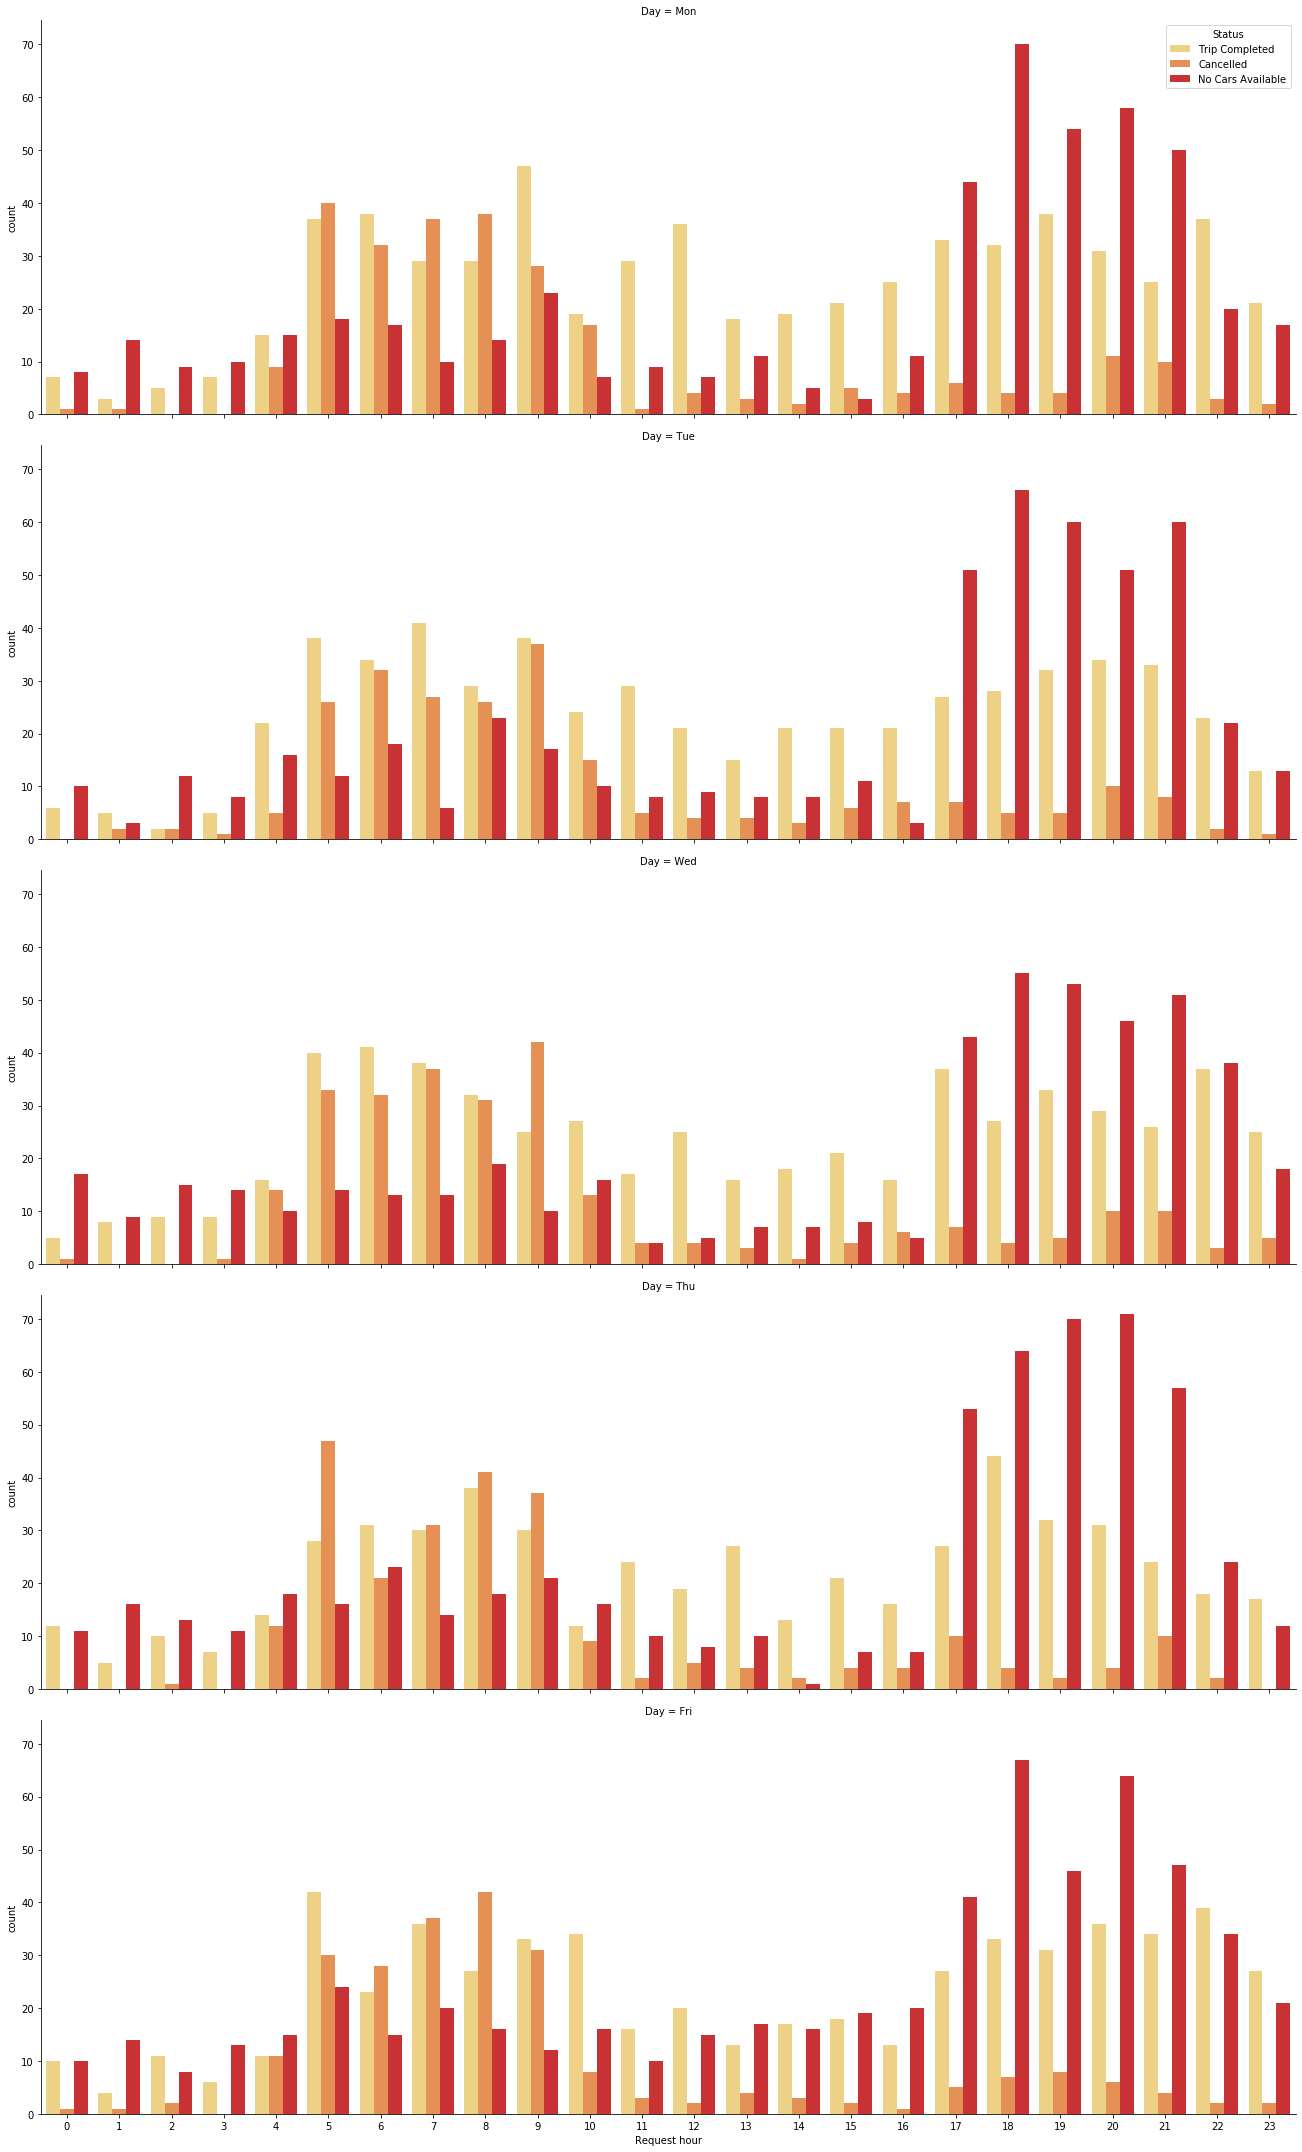

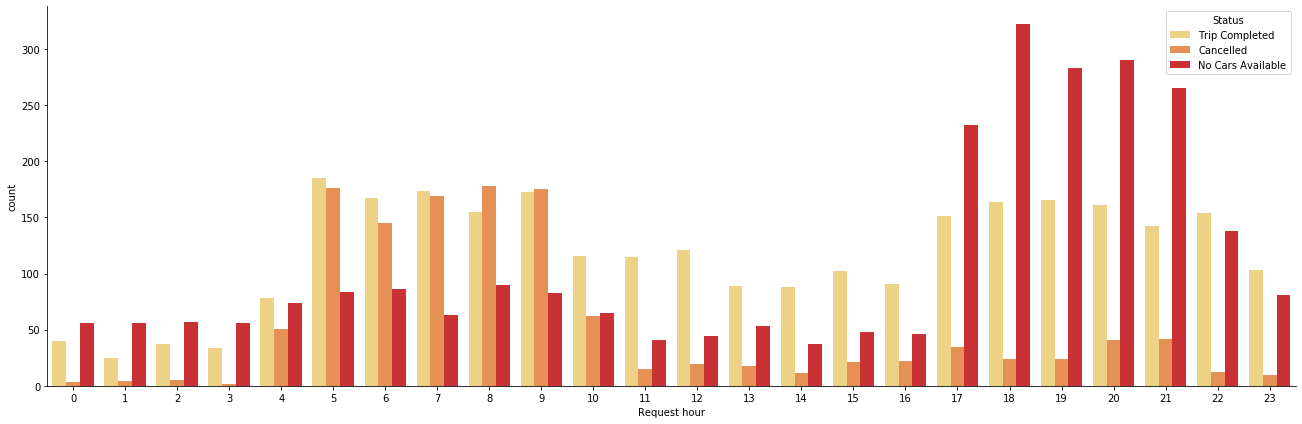

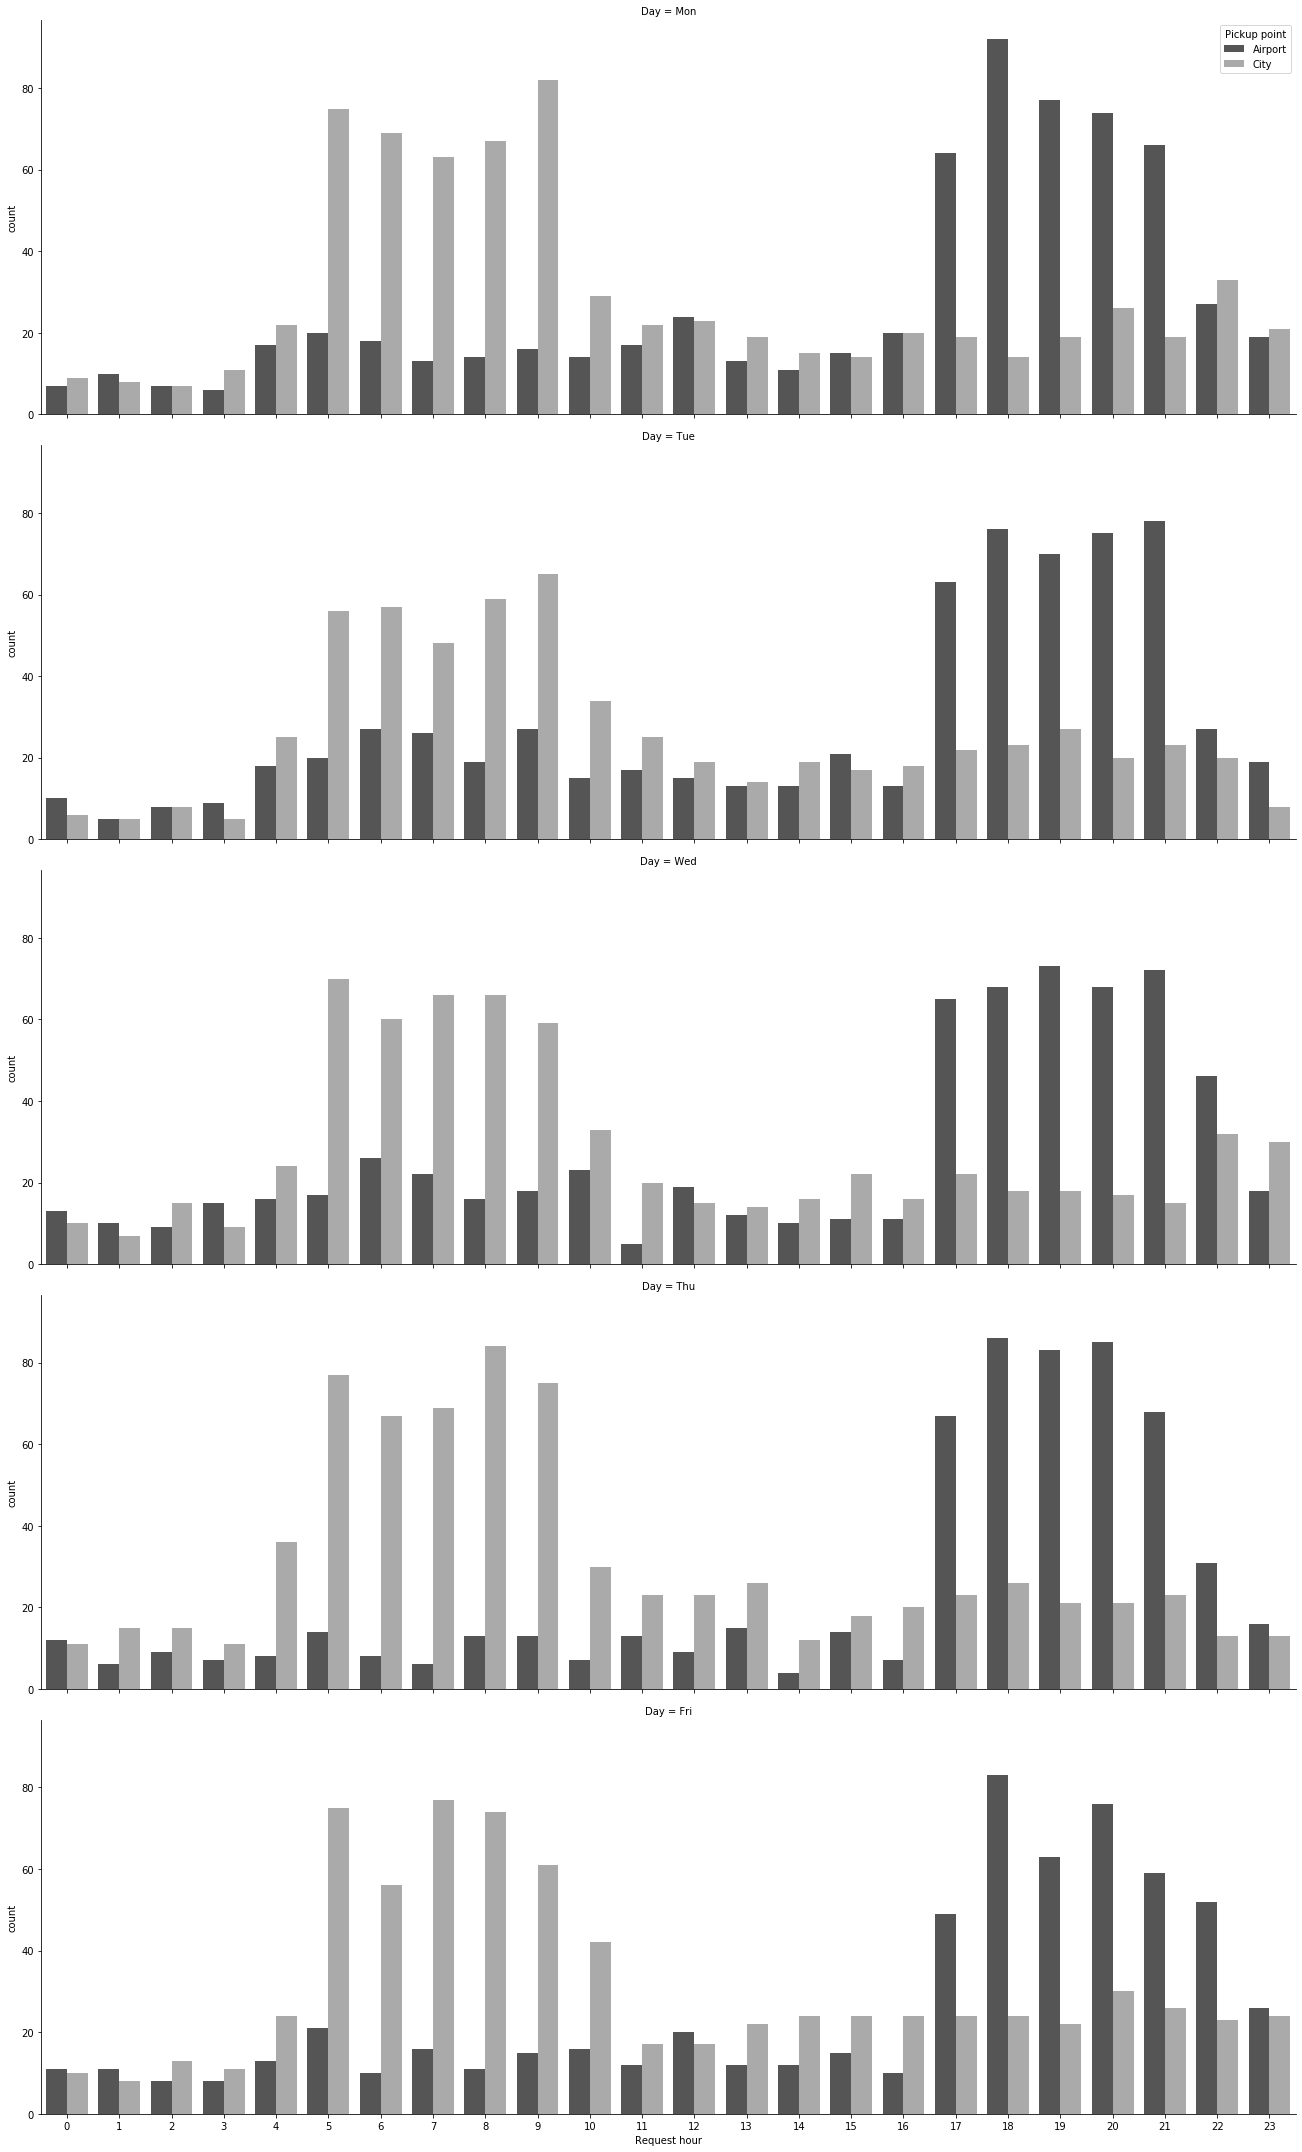

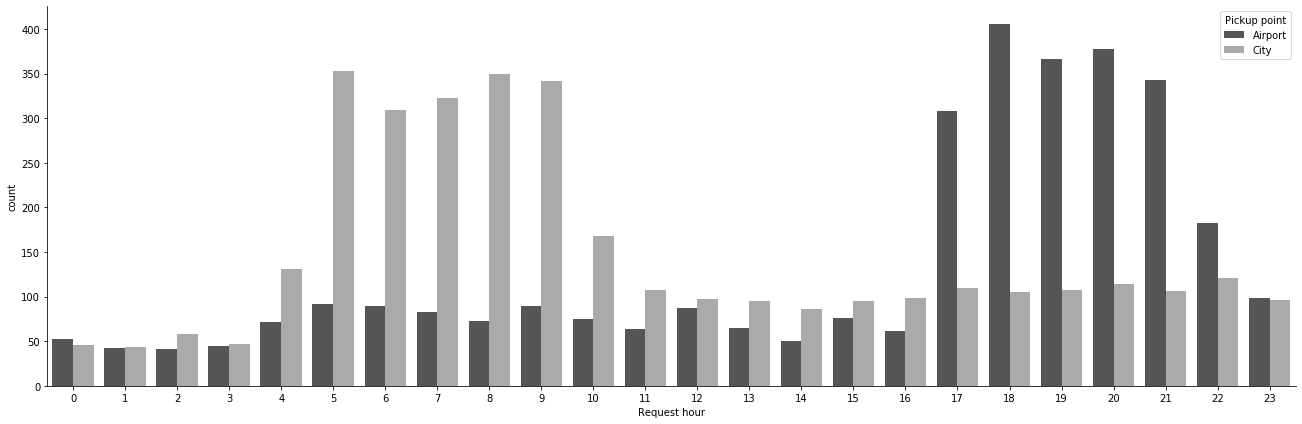

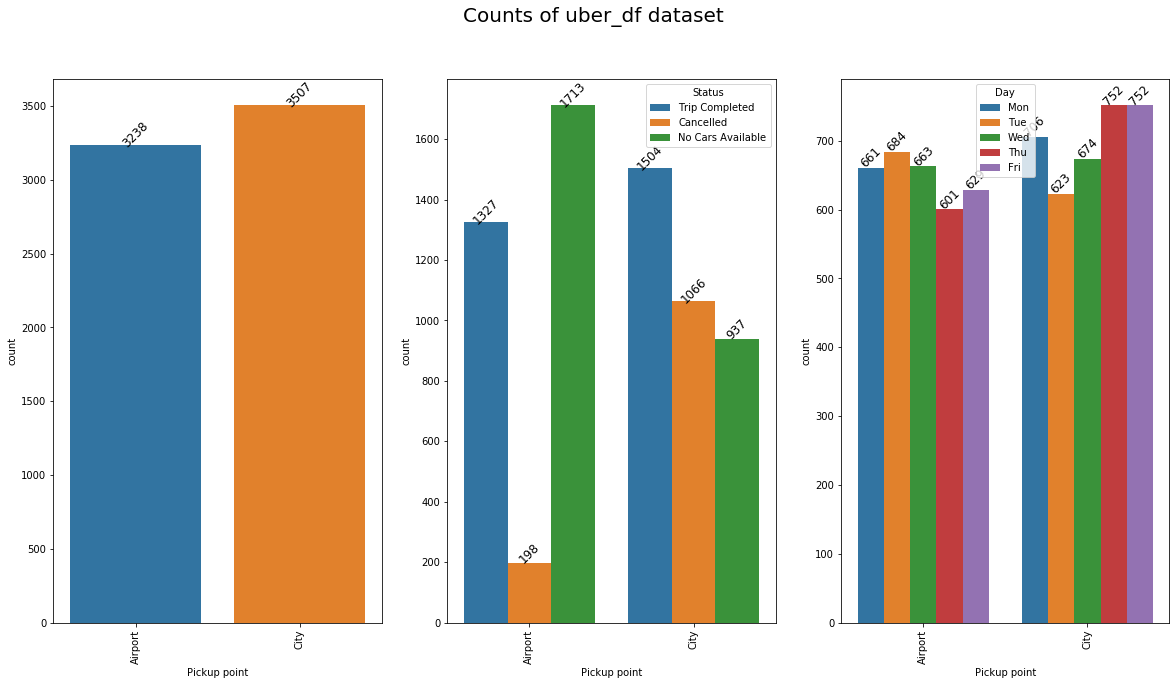

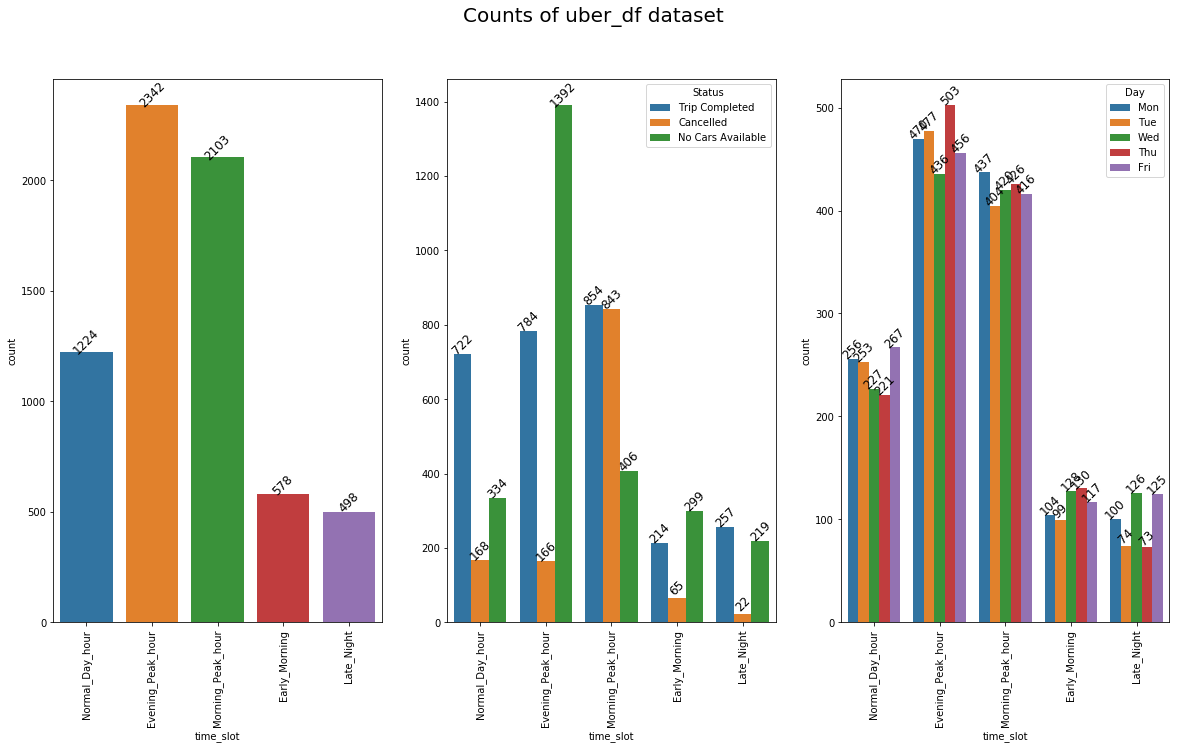

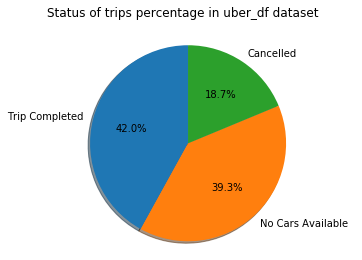

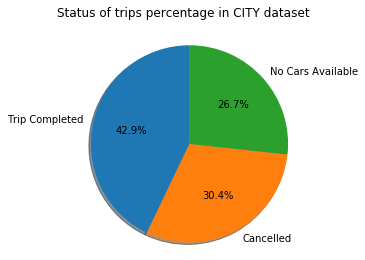

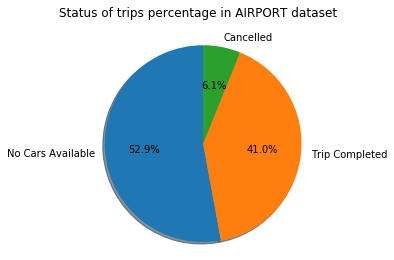

slot0


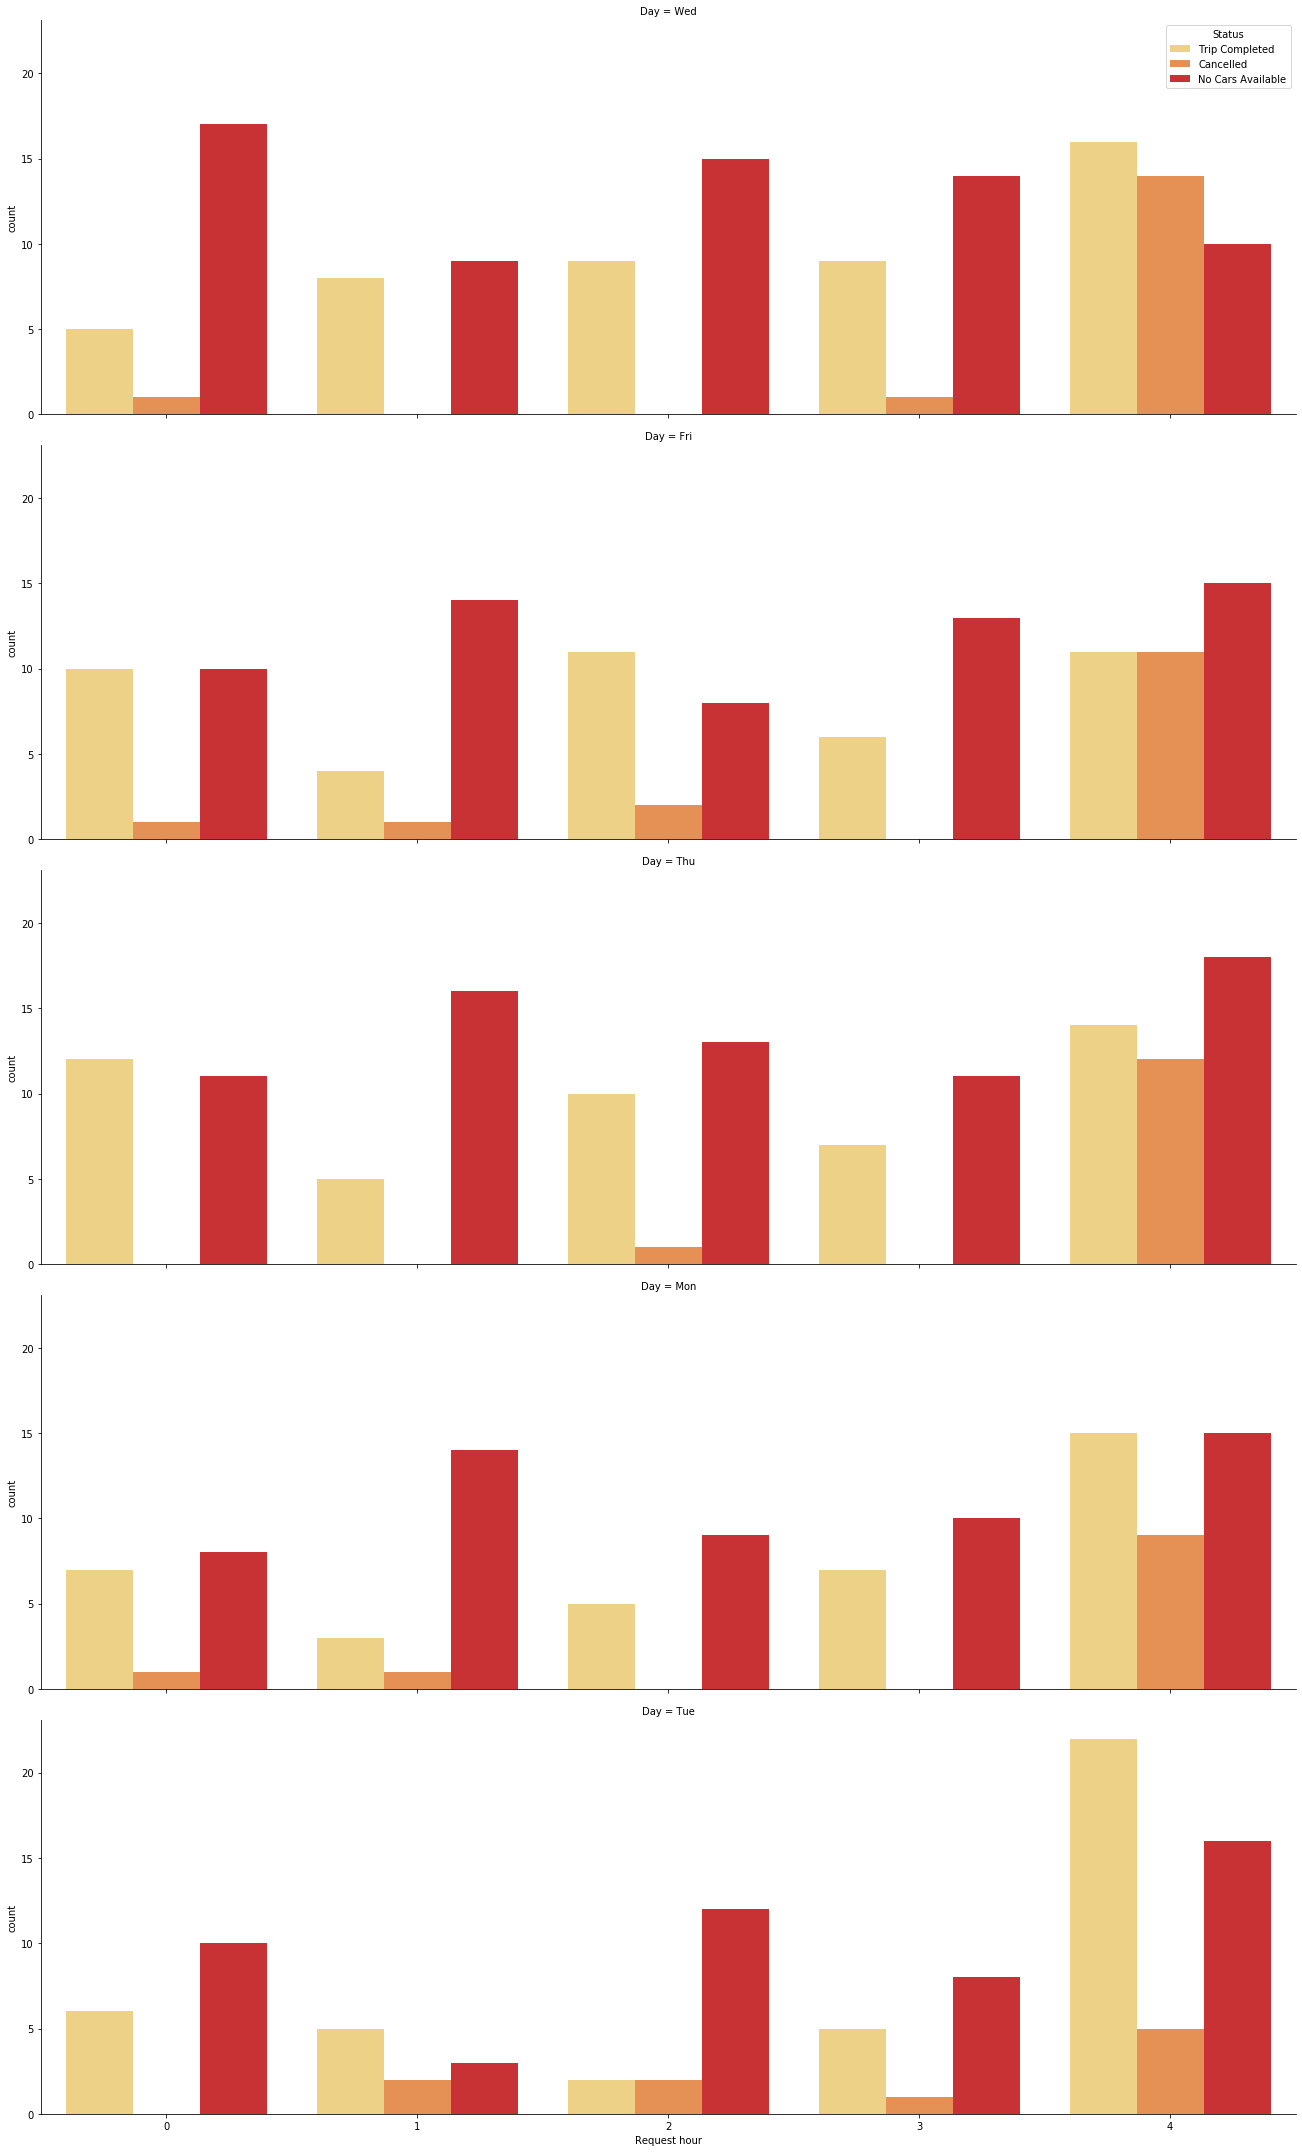

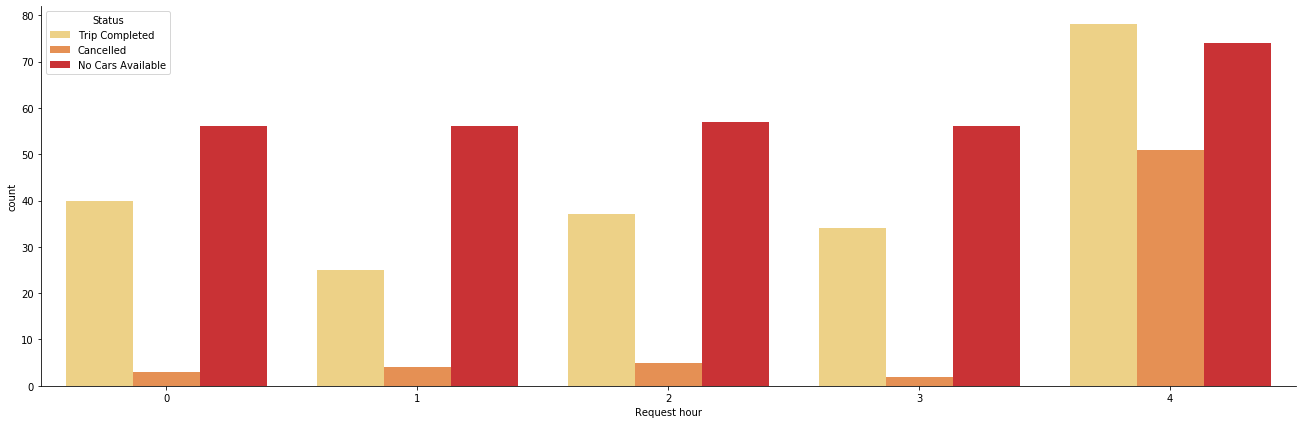

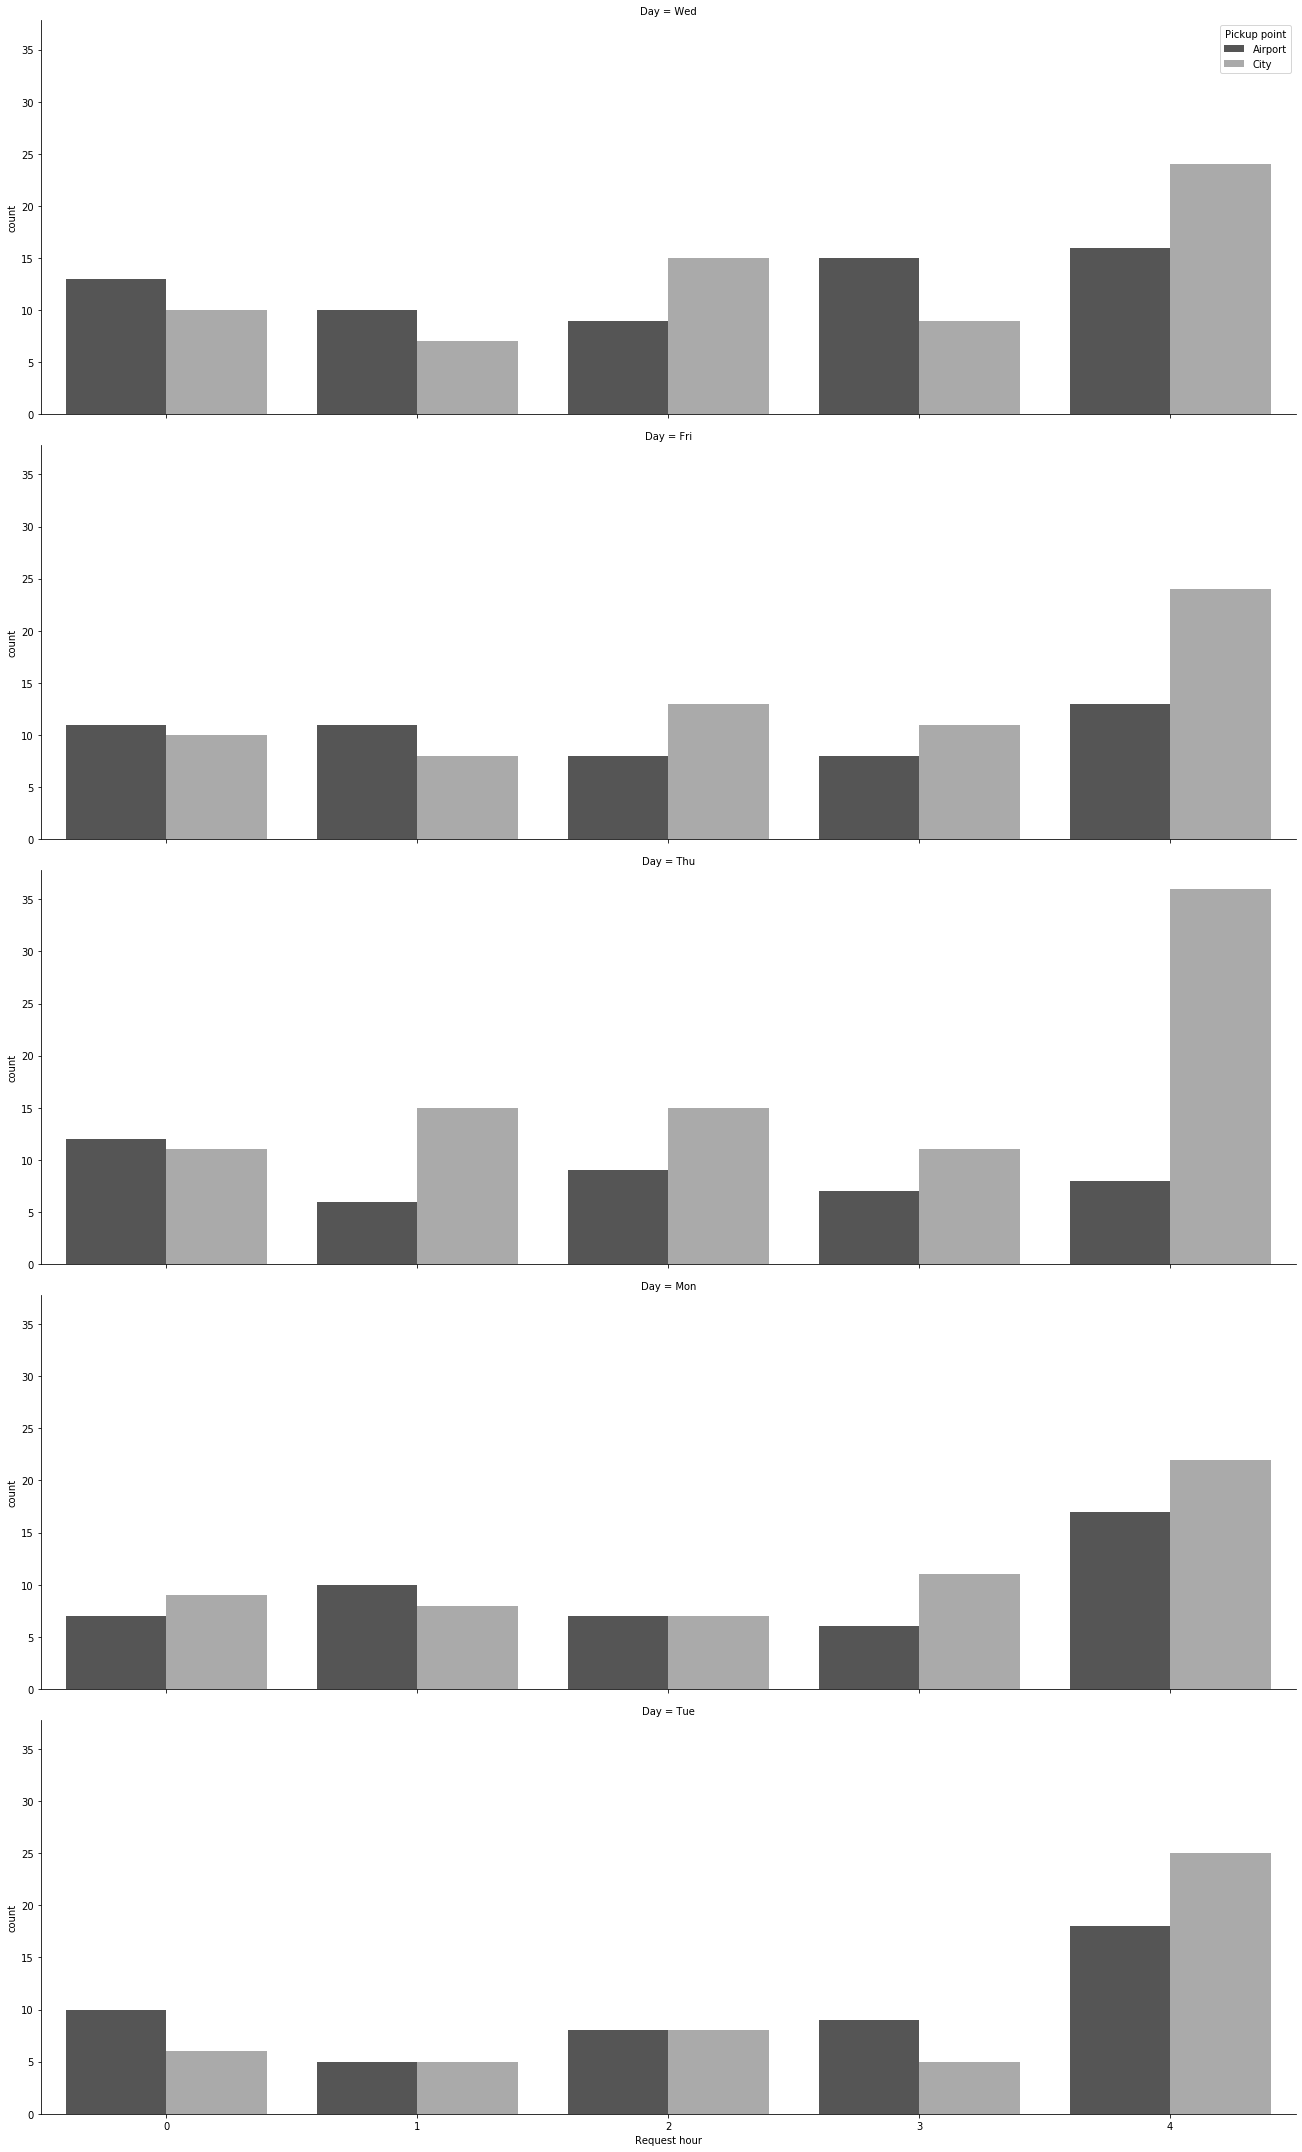

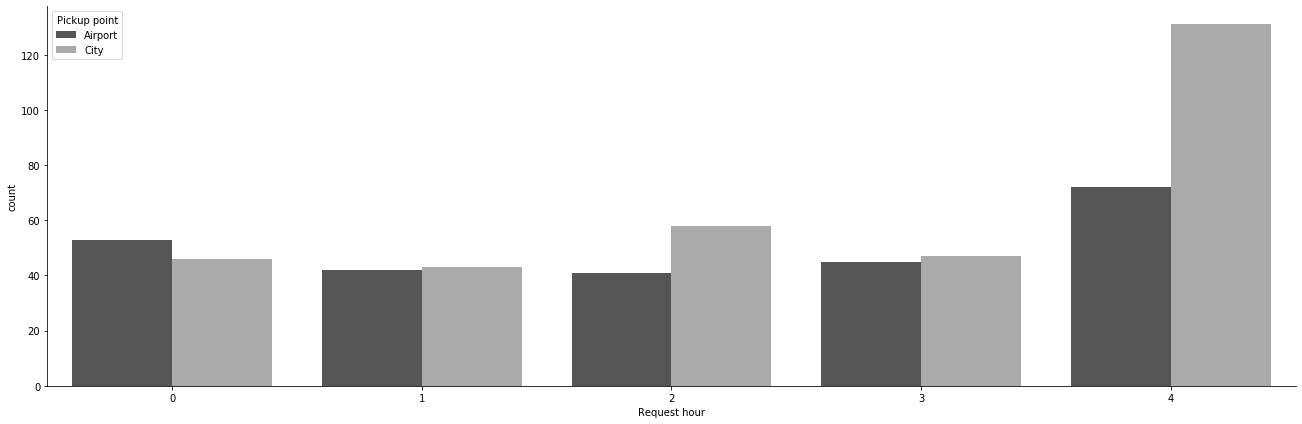

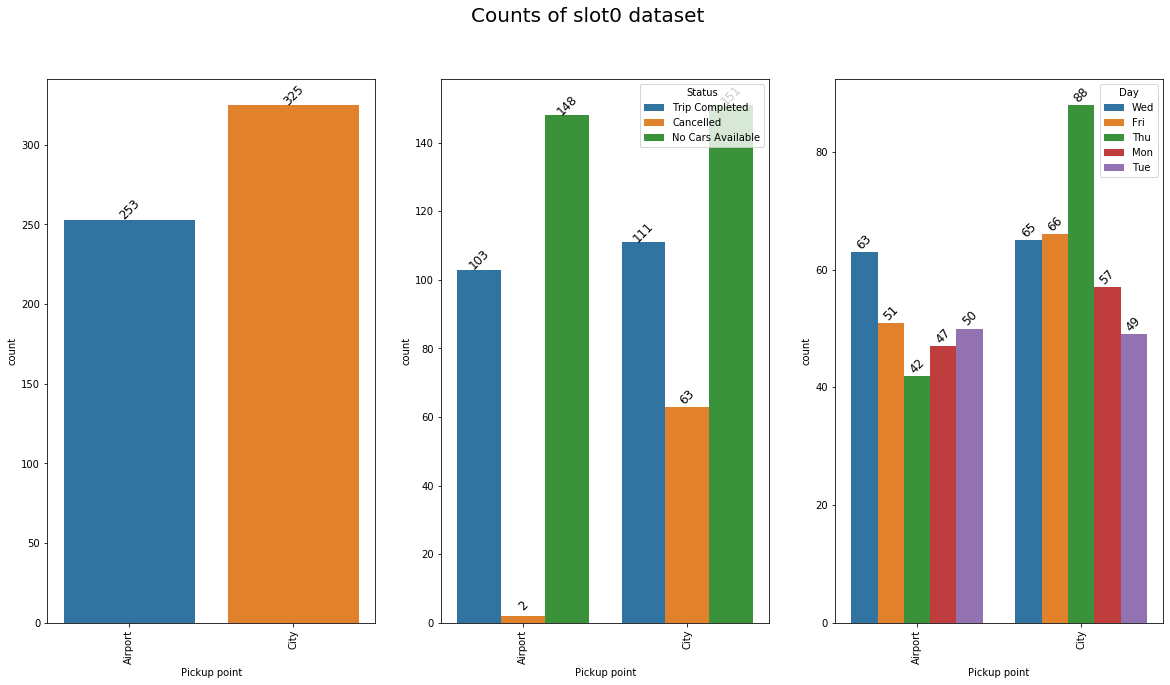

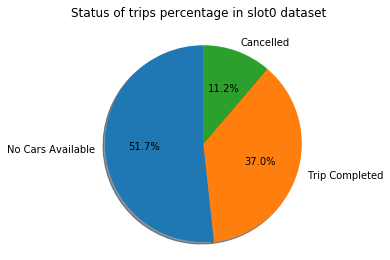

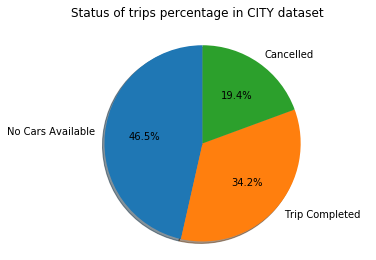

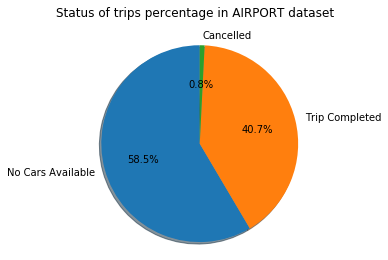

slot1


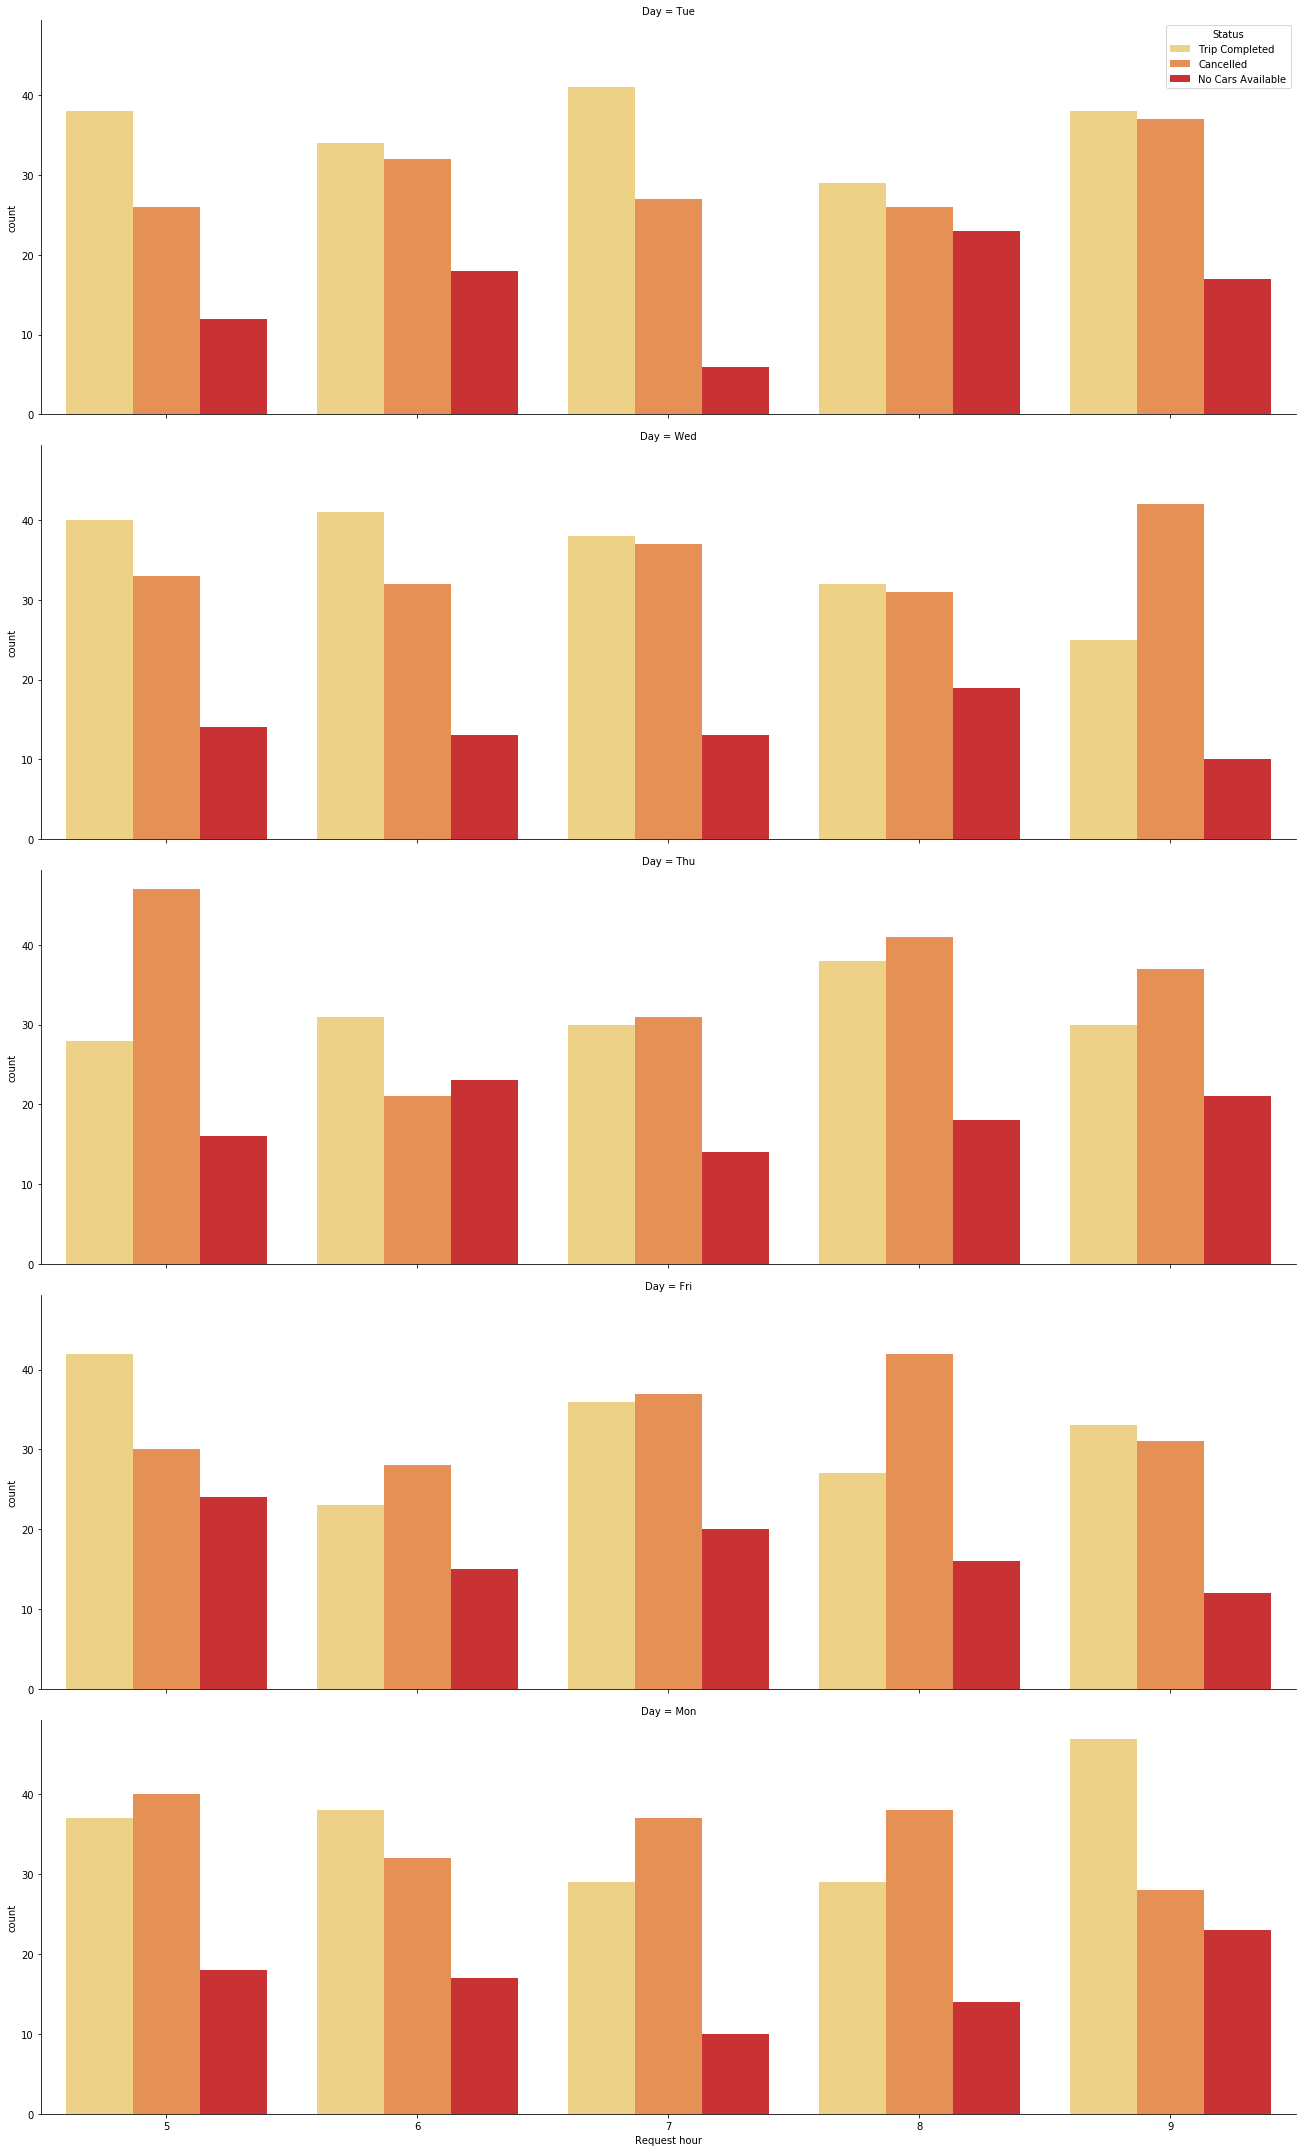

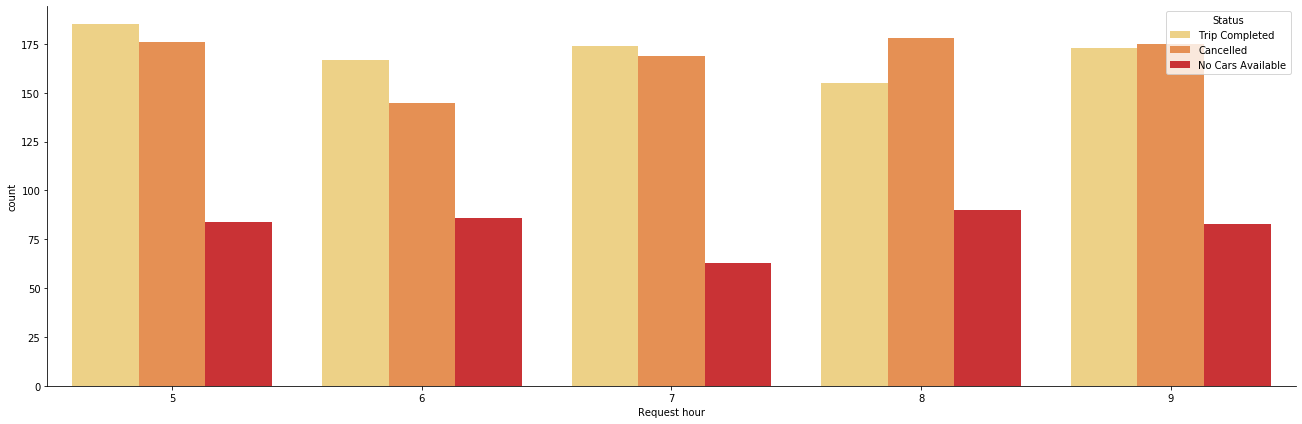

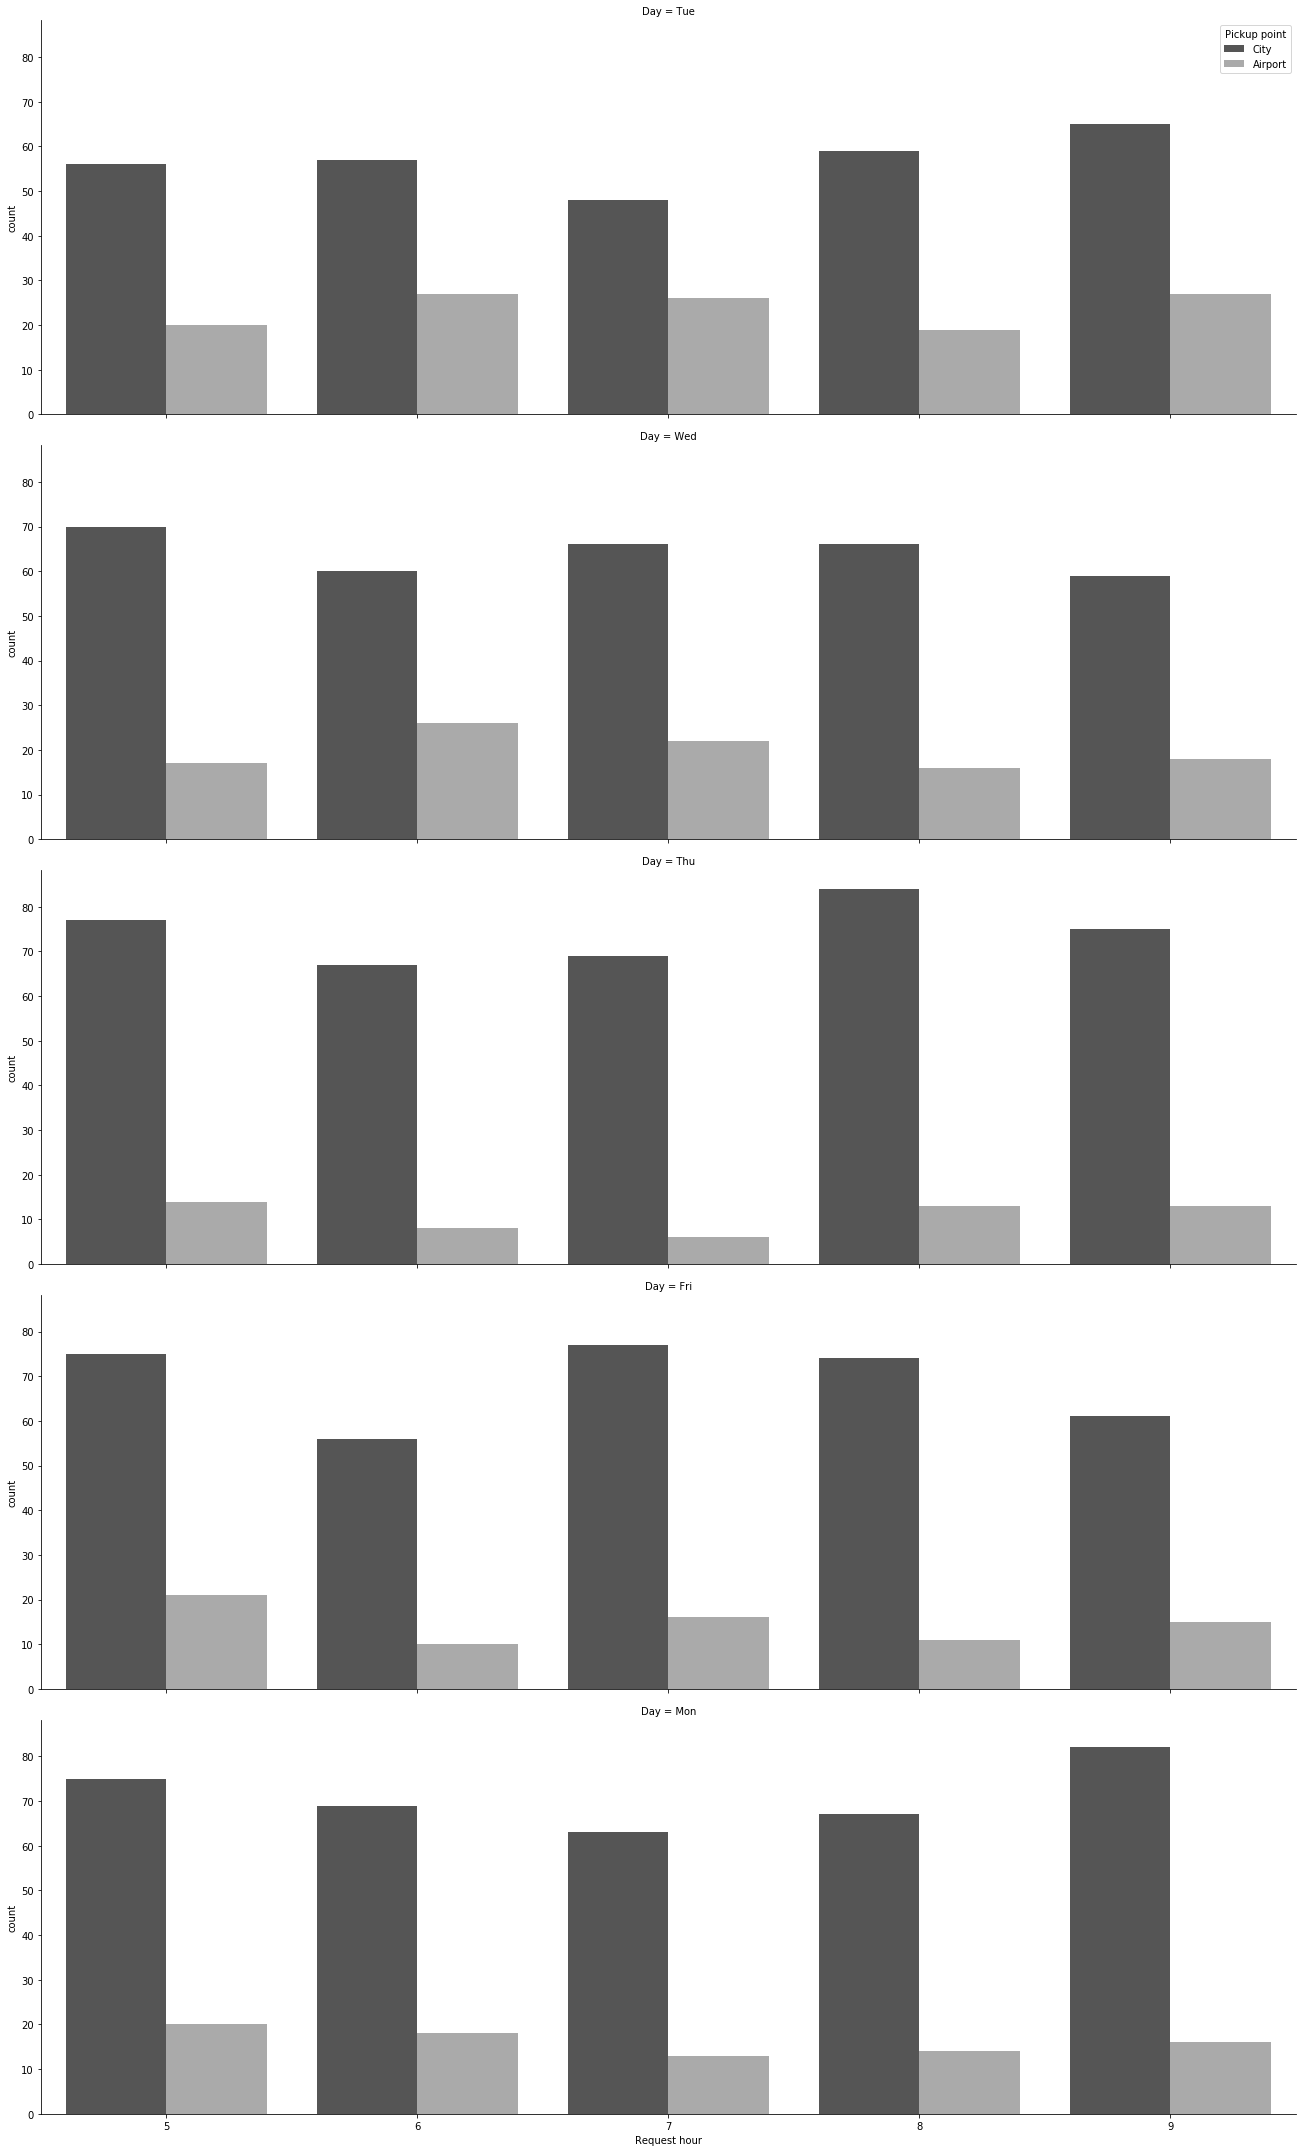

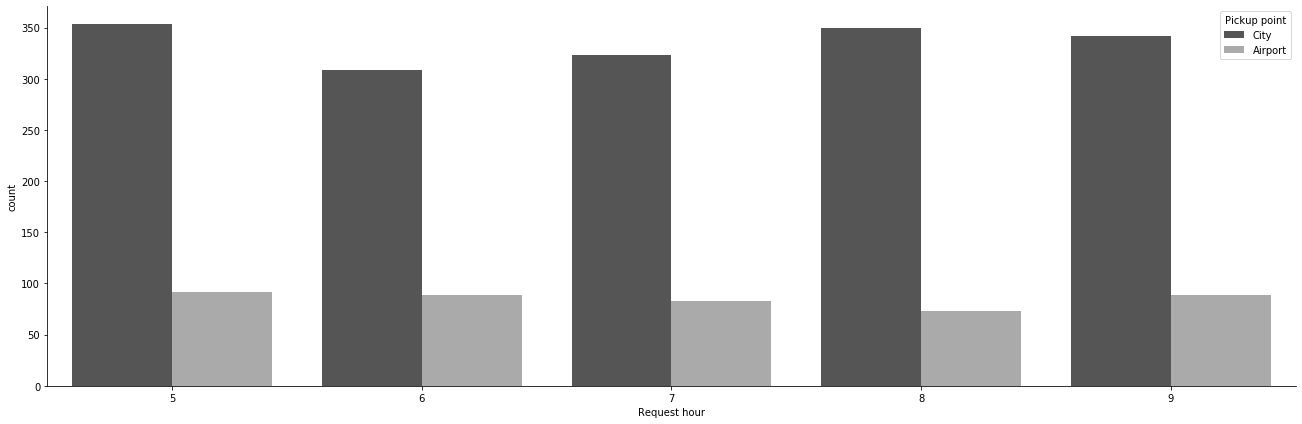

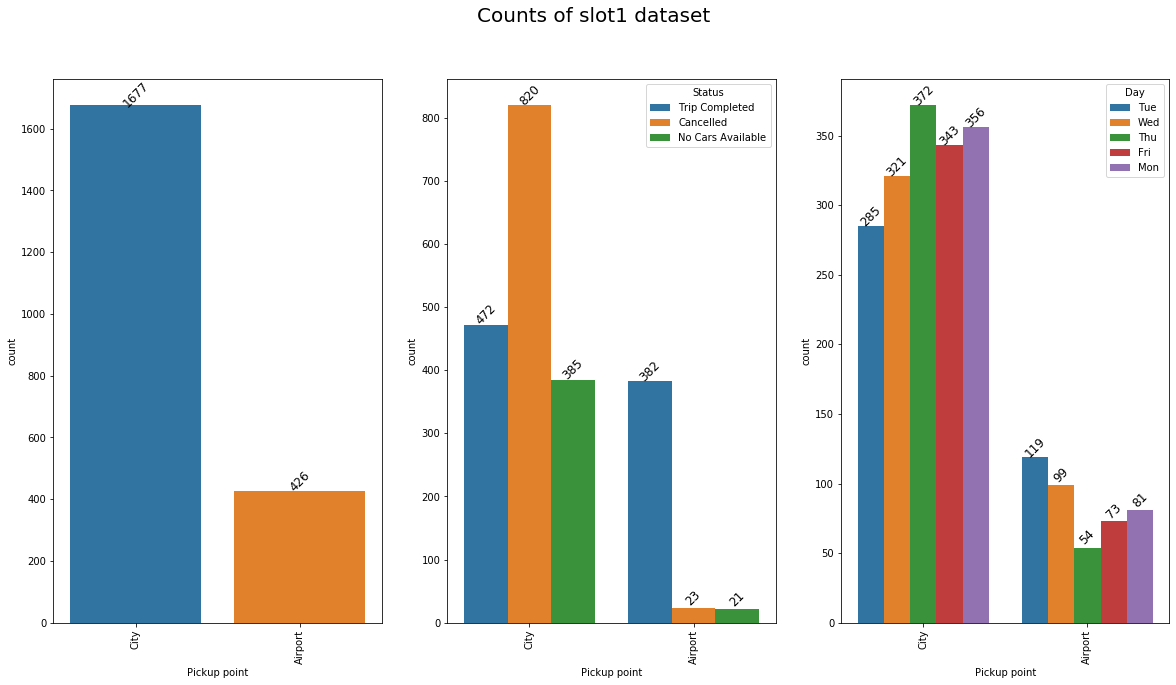

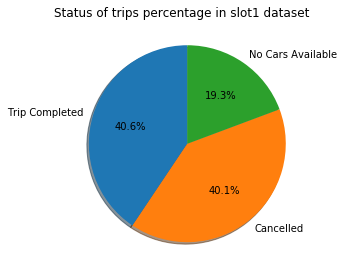

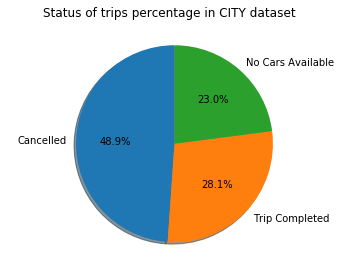

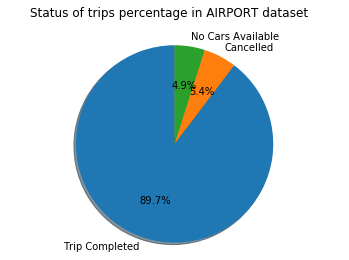

slot2


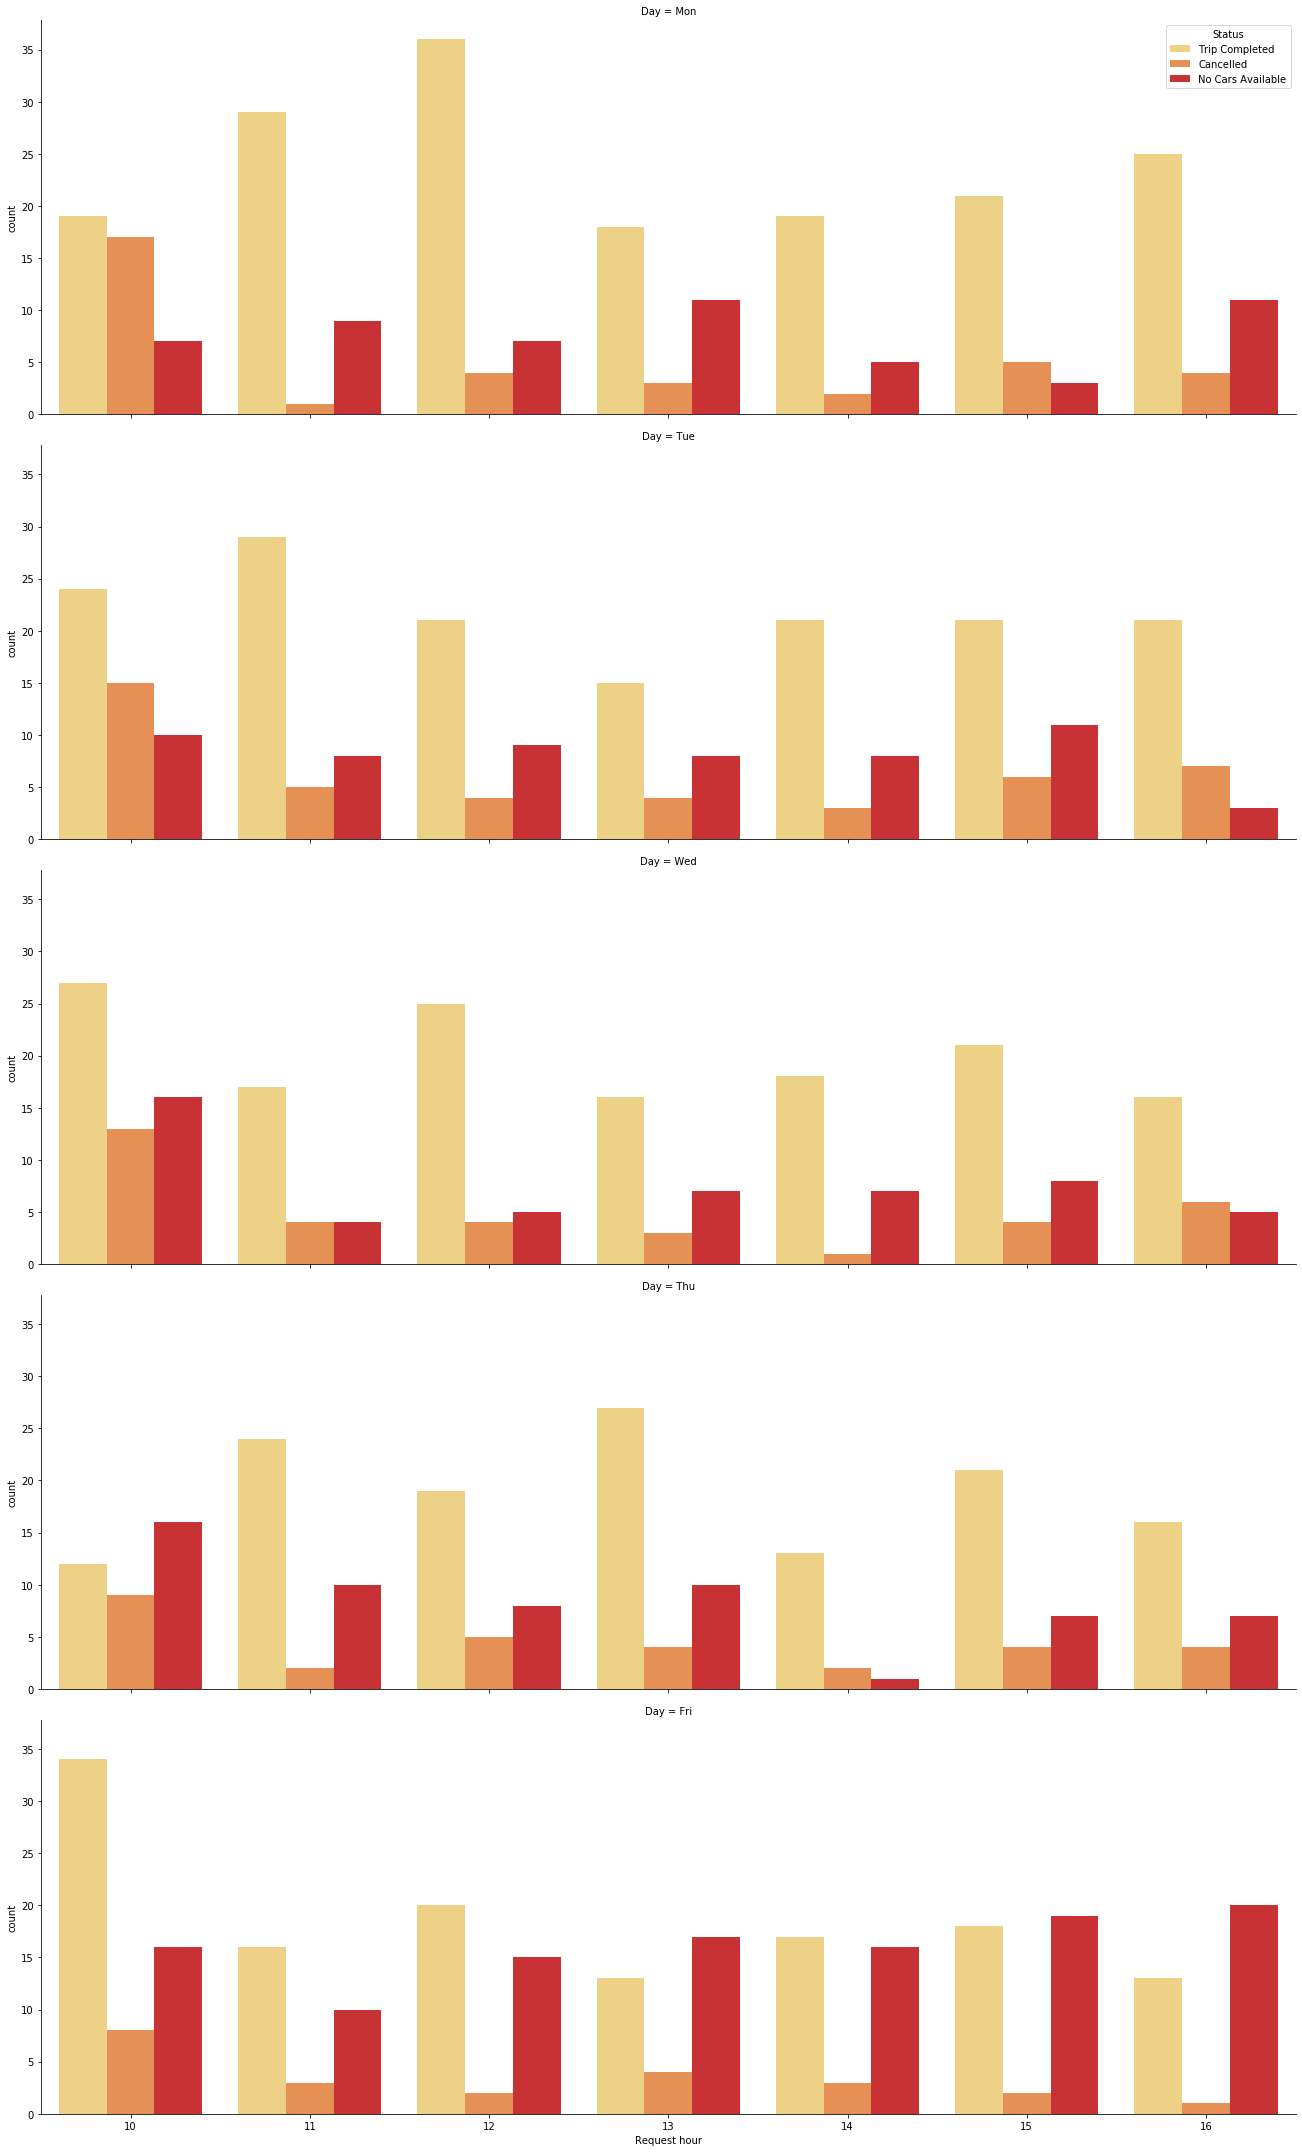

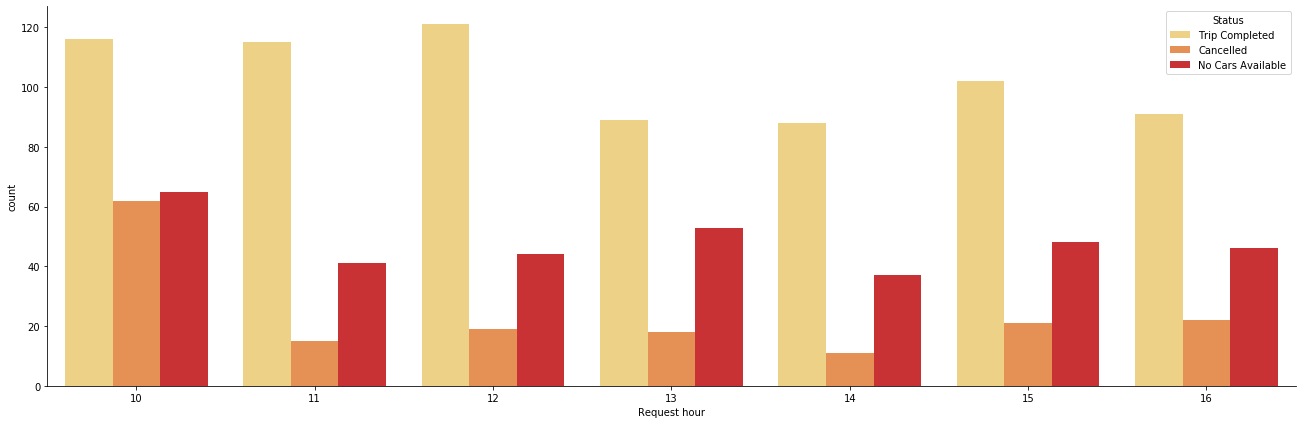

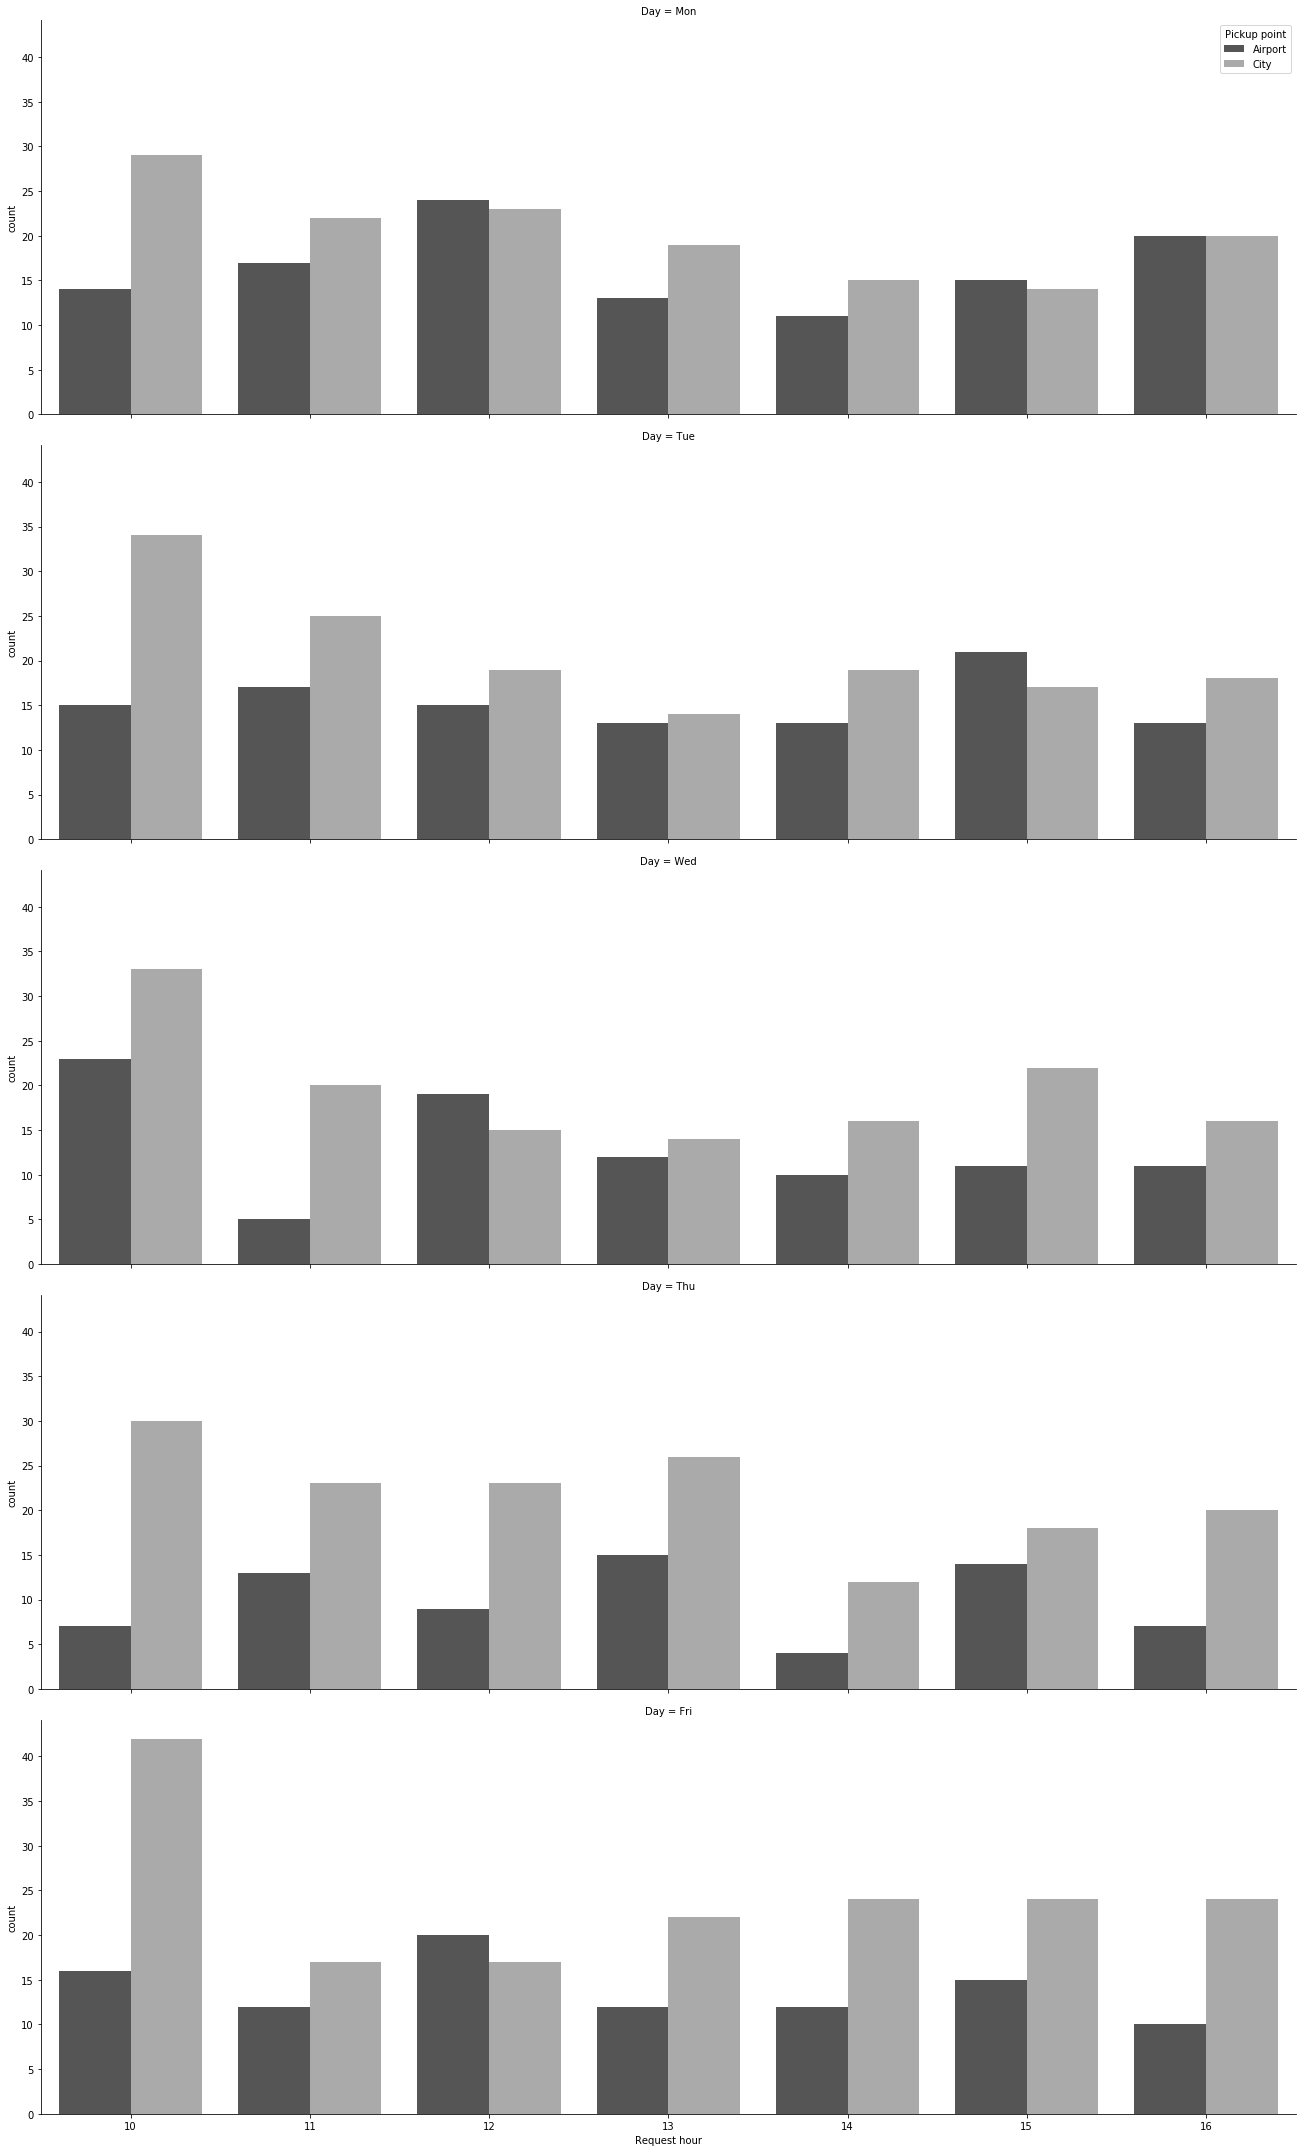

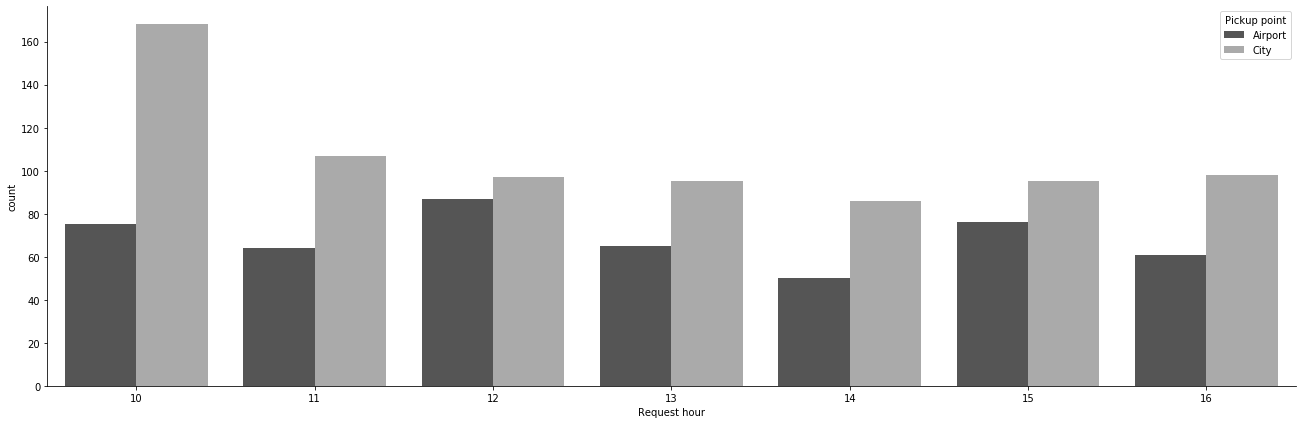

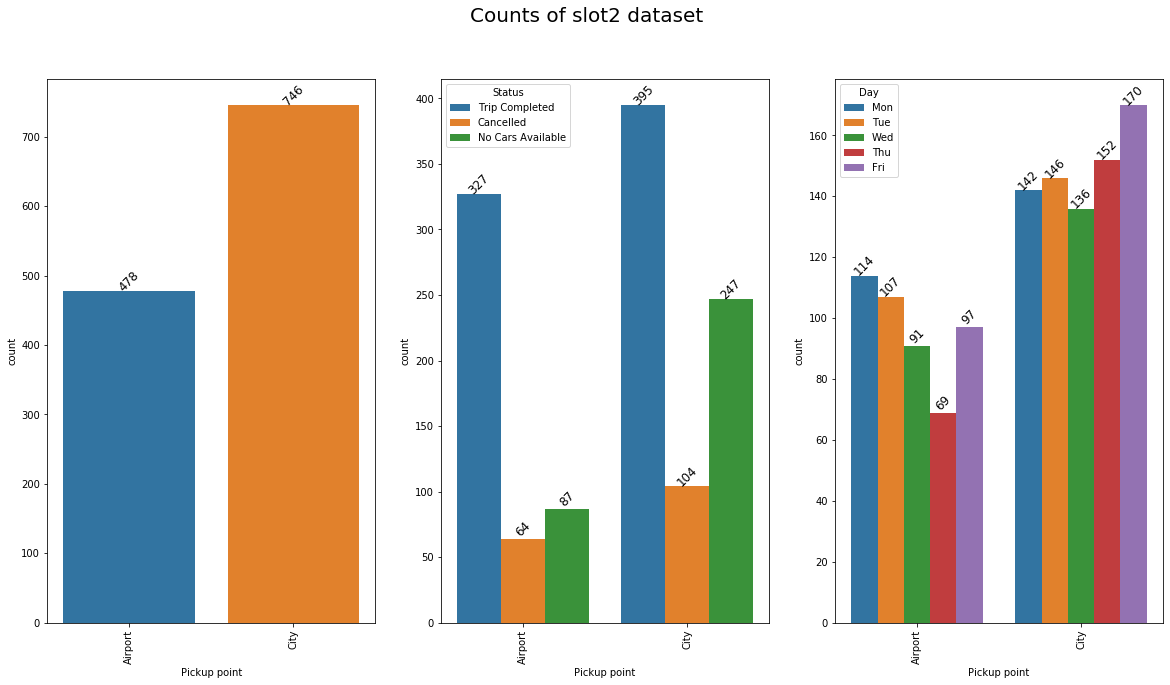

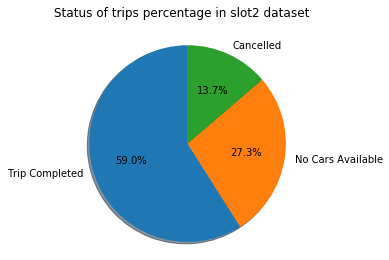

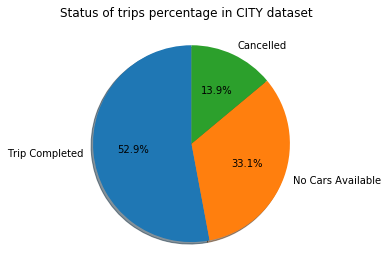

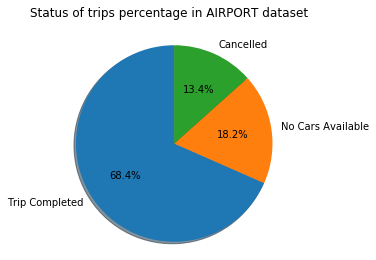

slot3


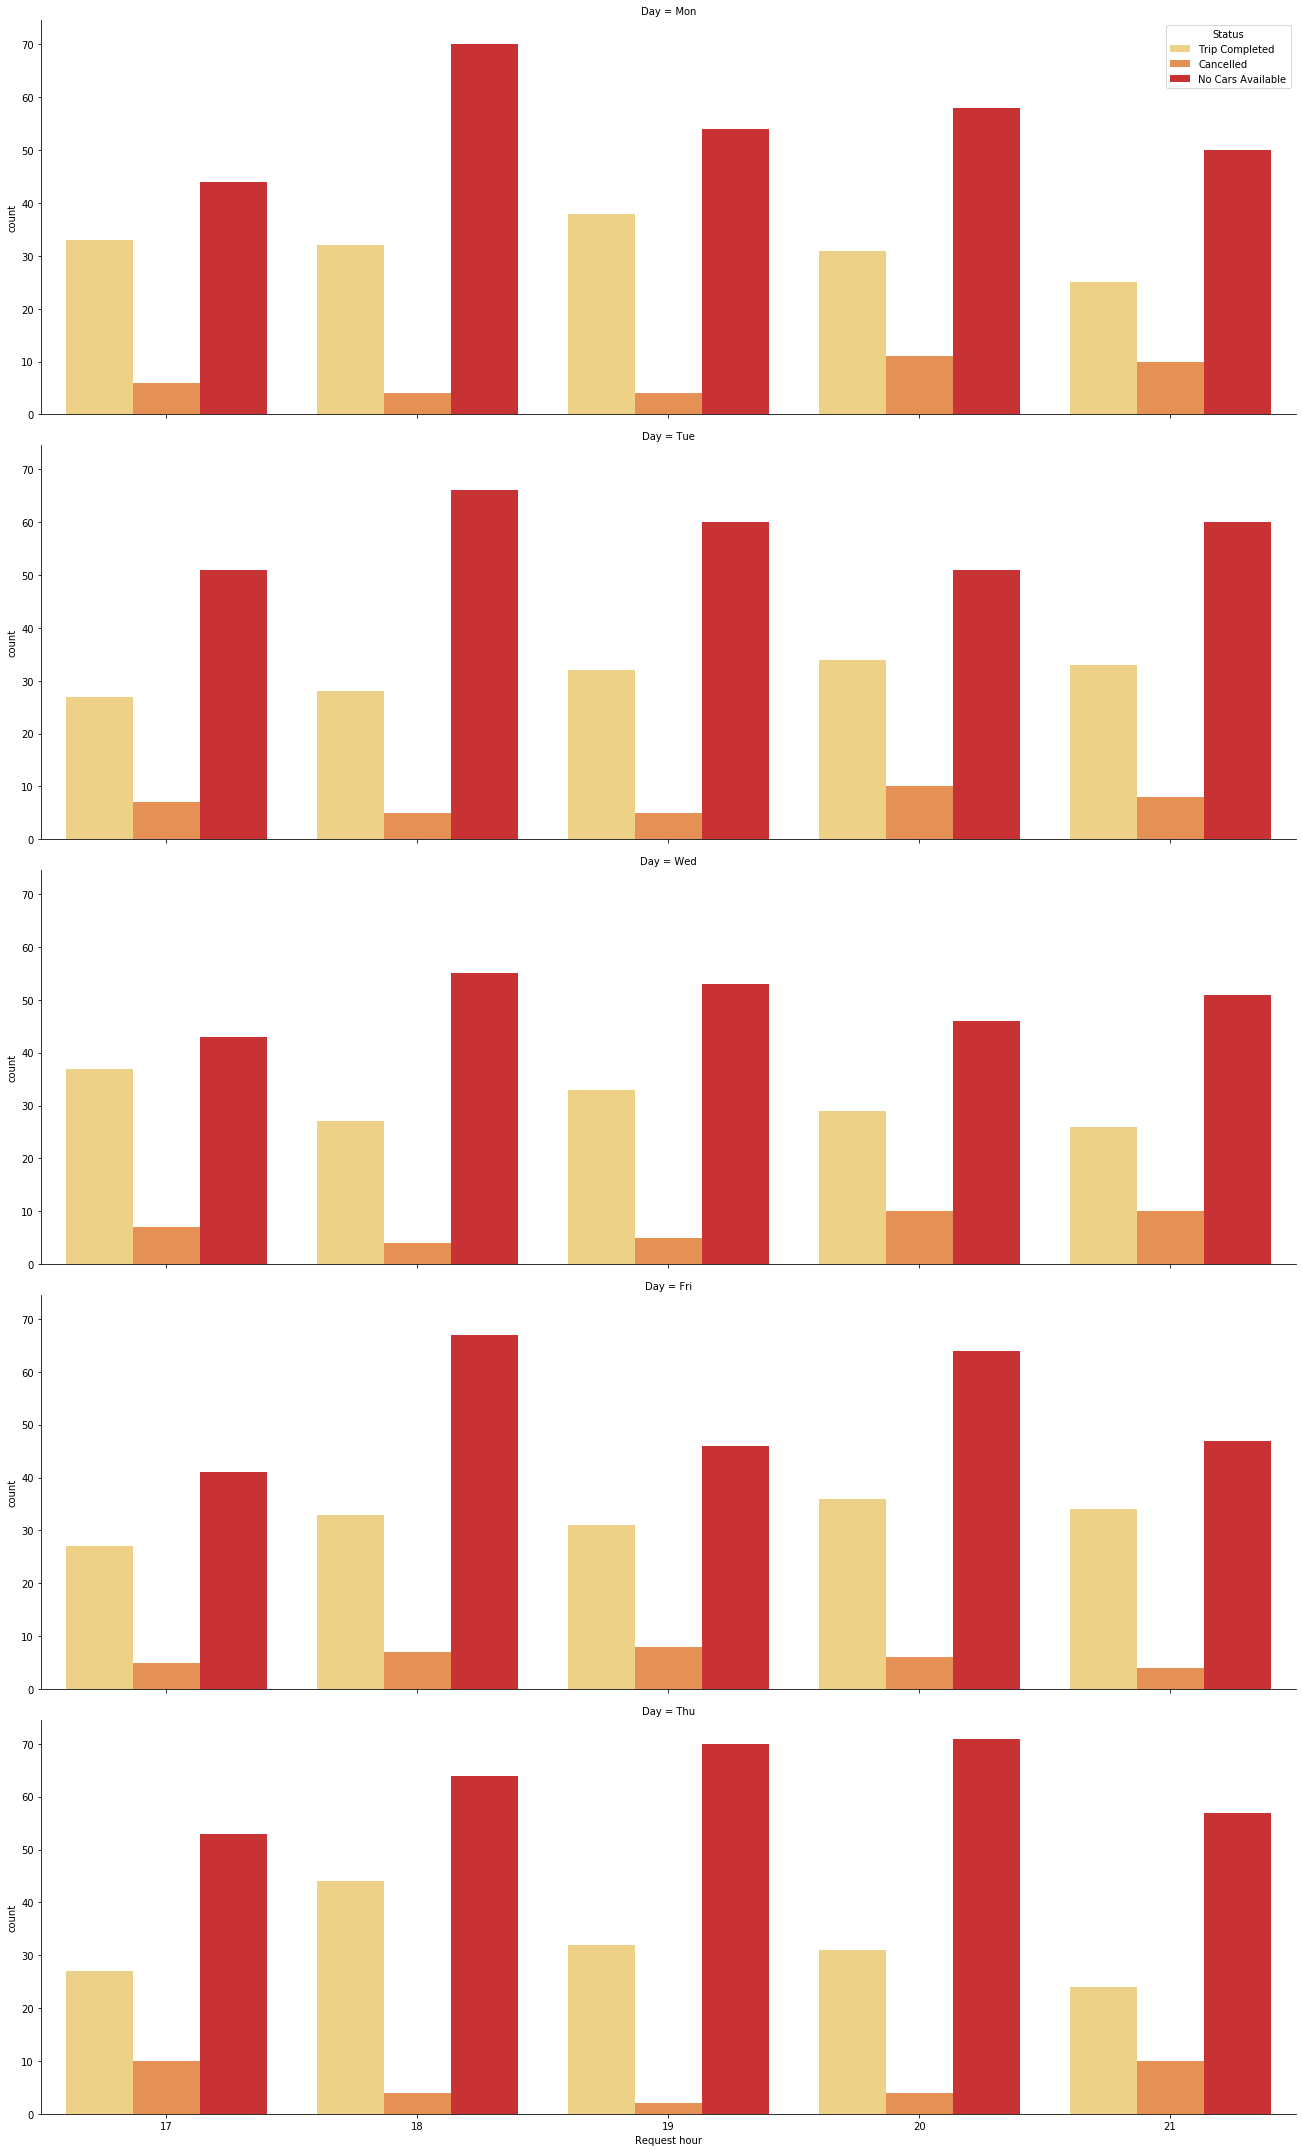

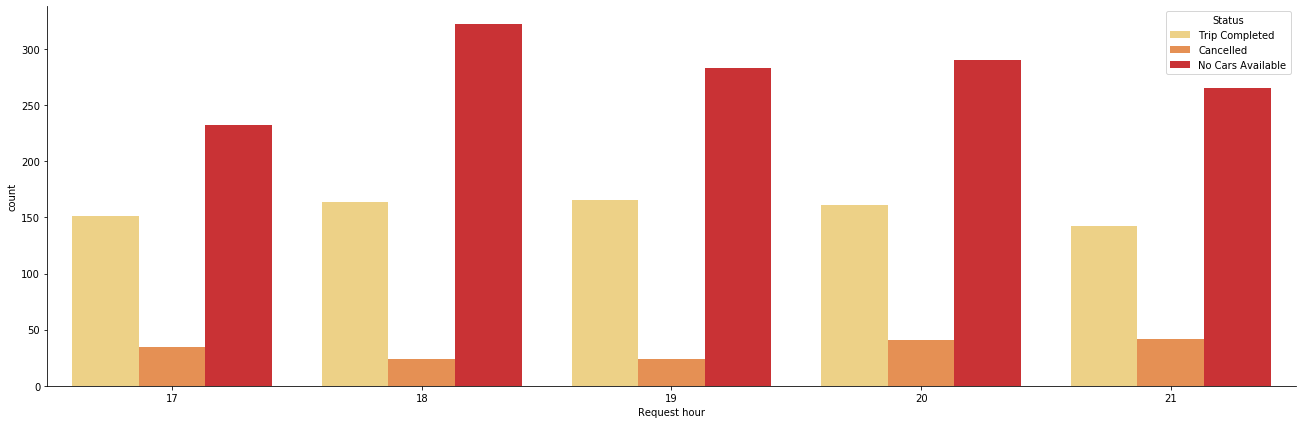

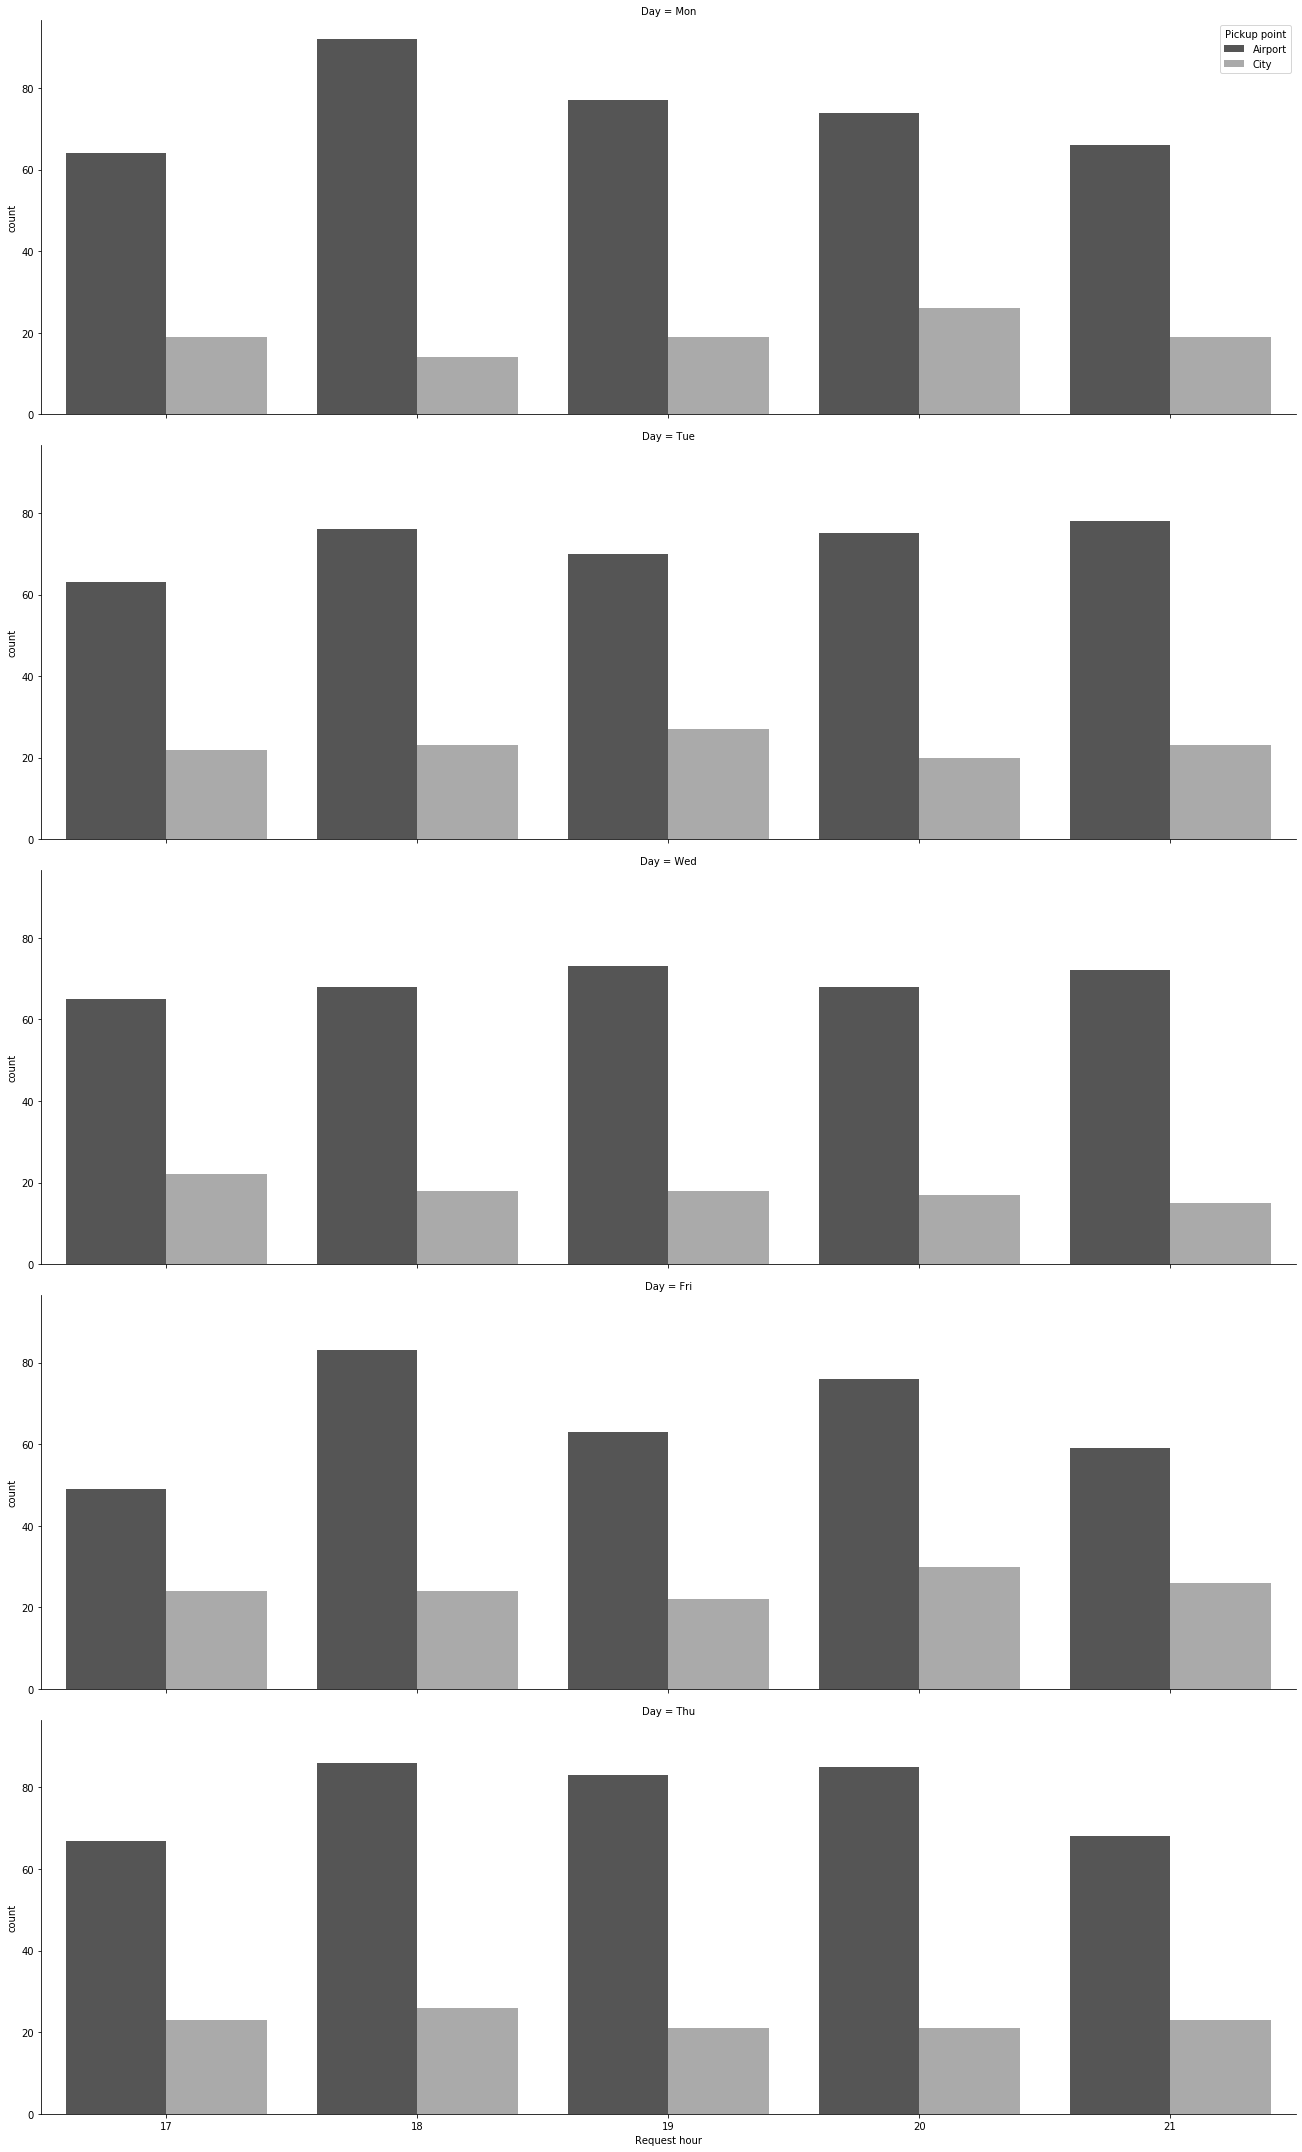

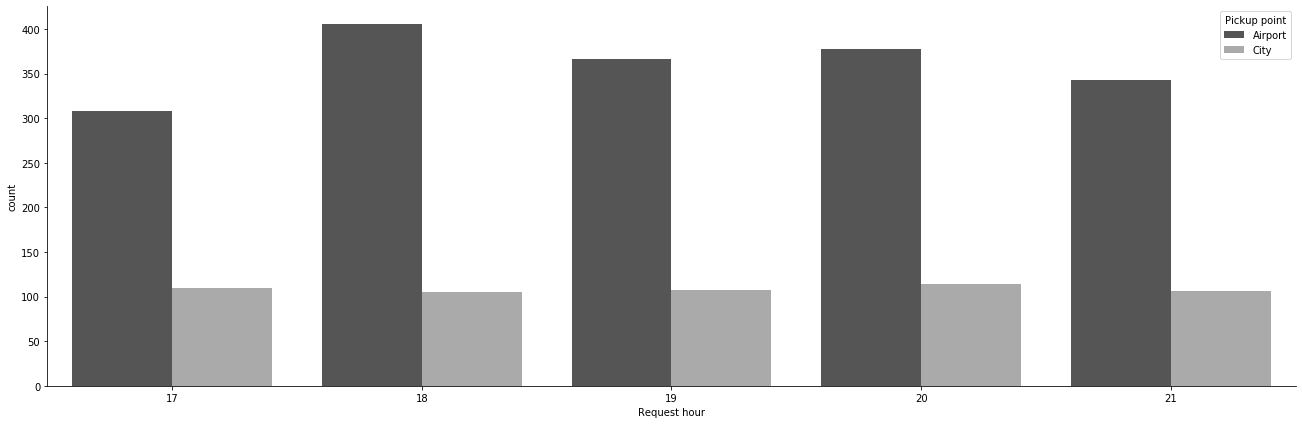

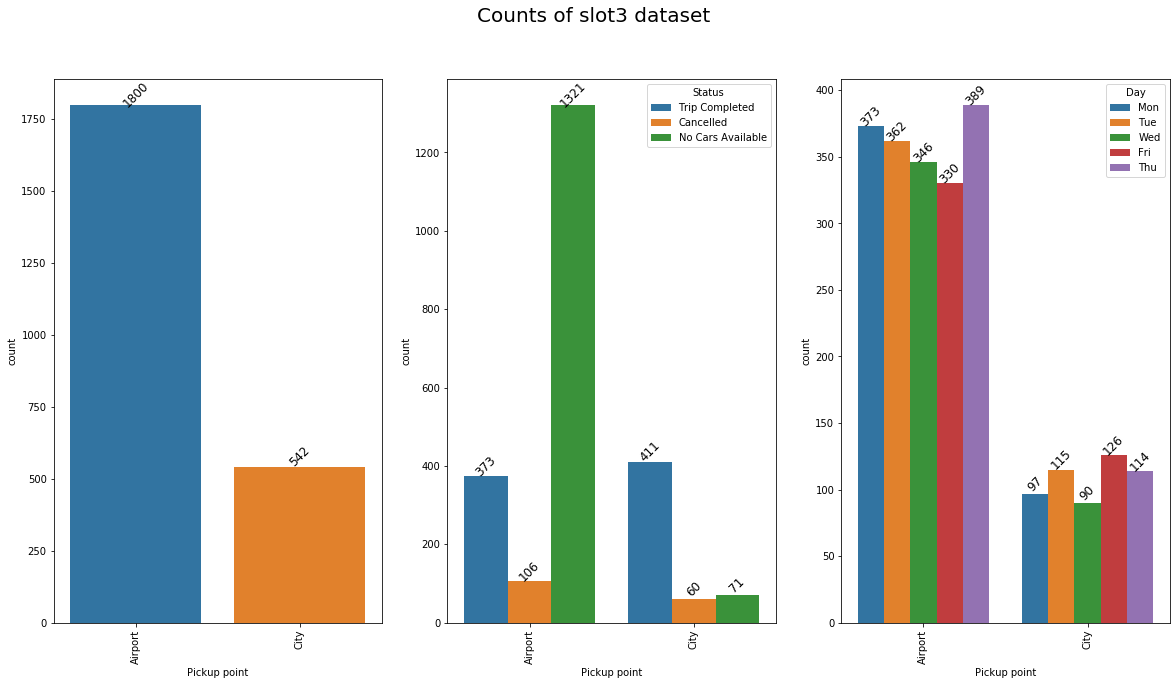

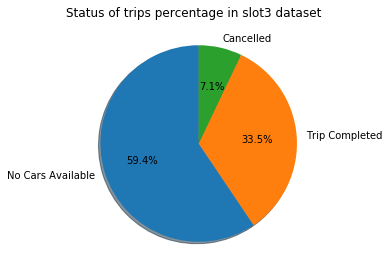

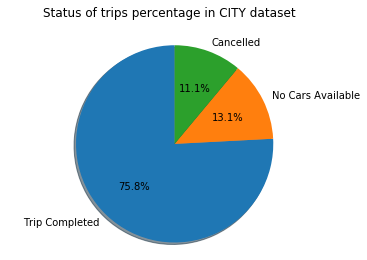

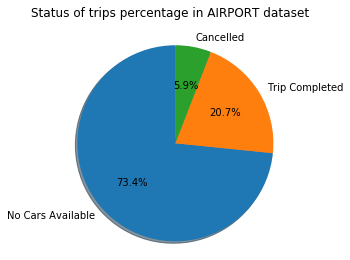

slot4


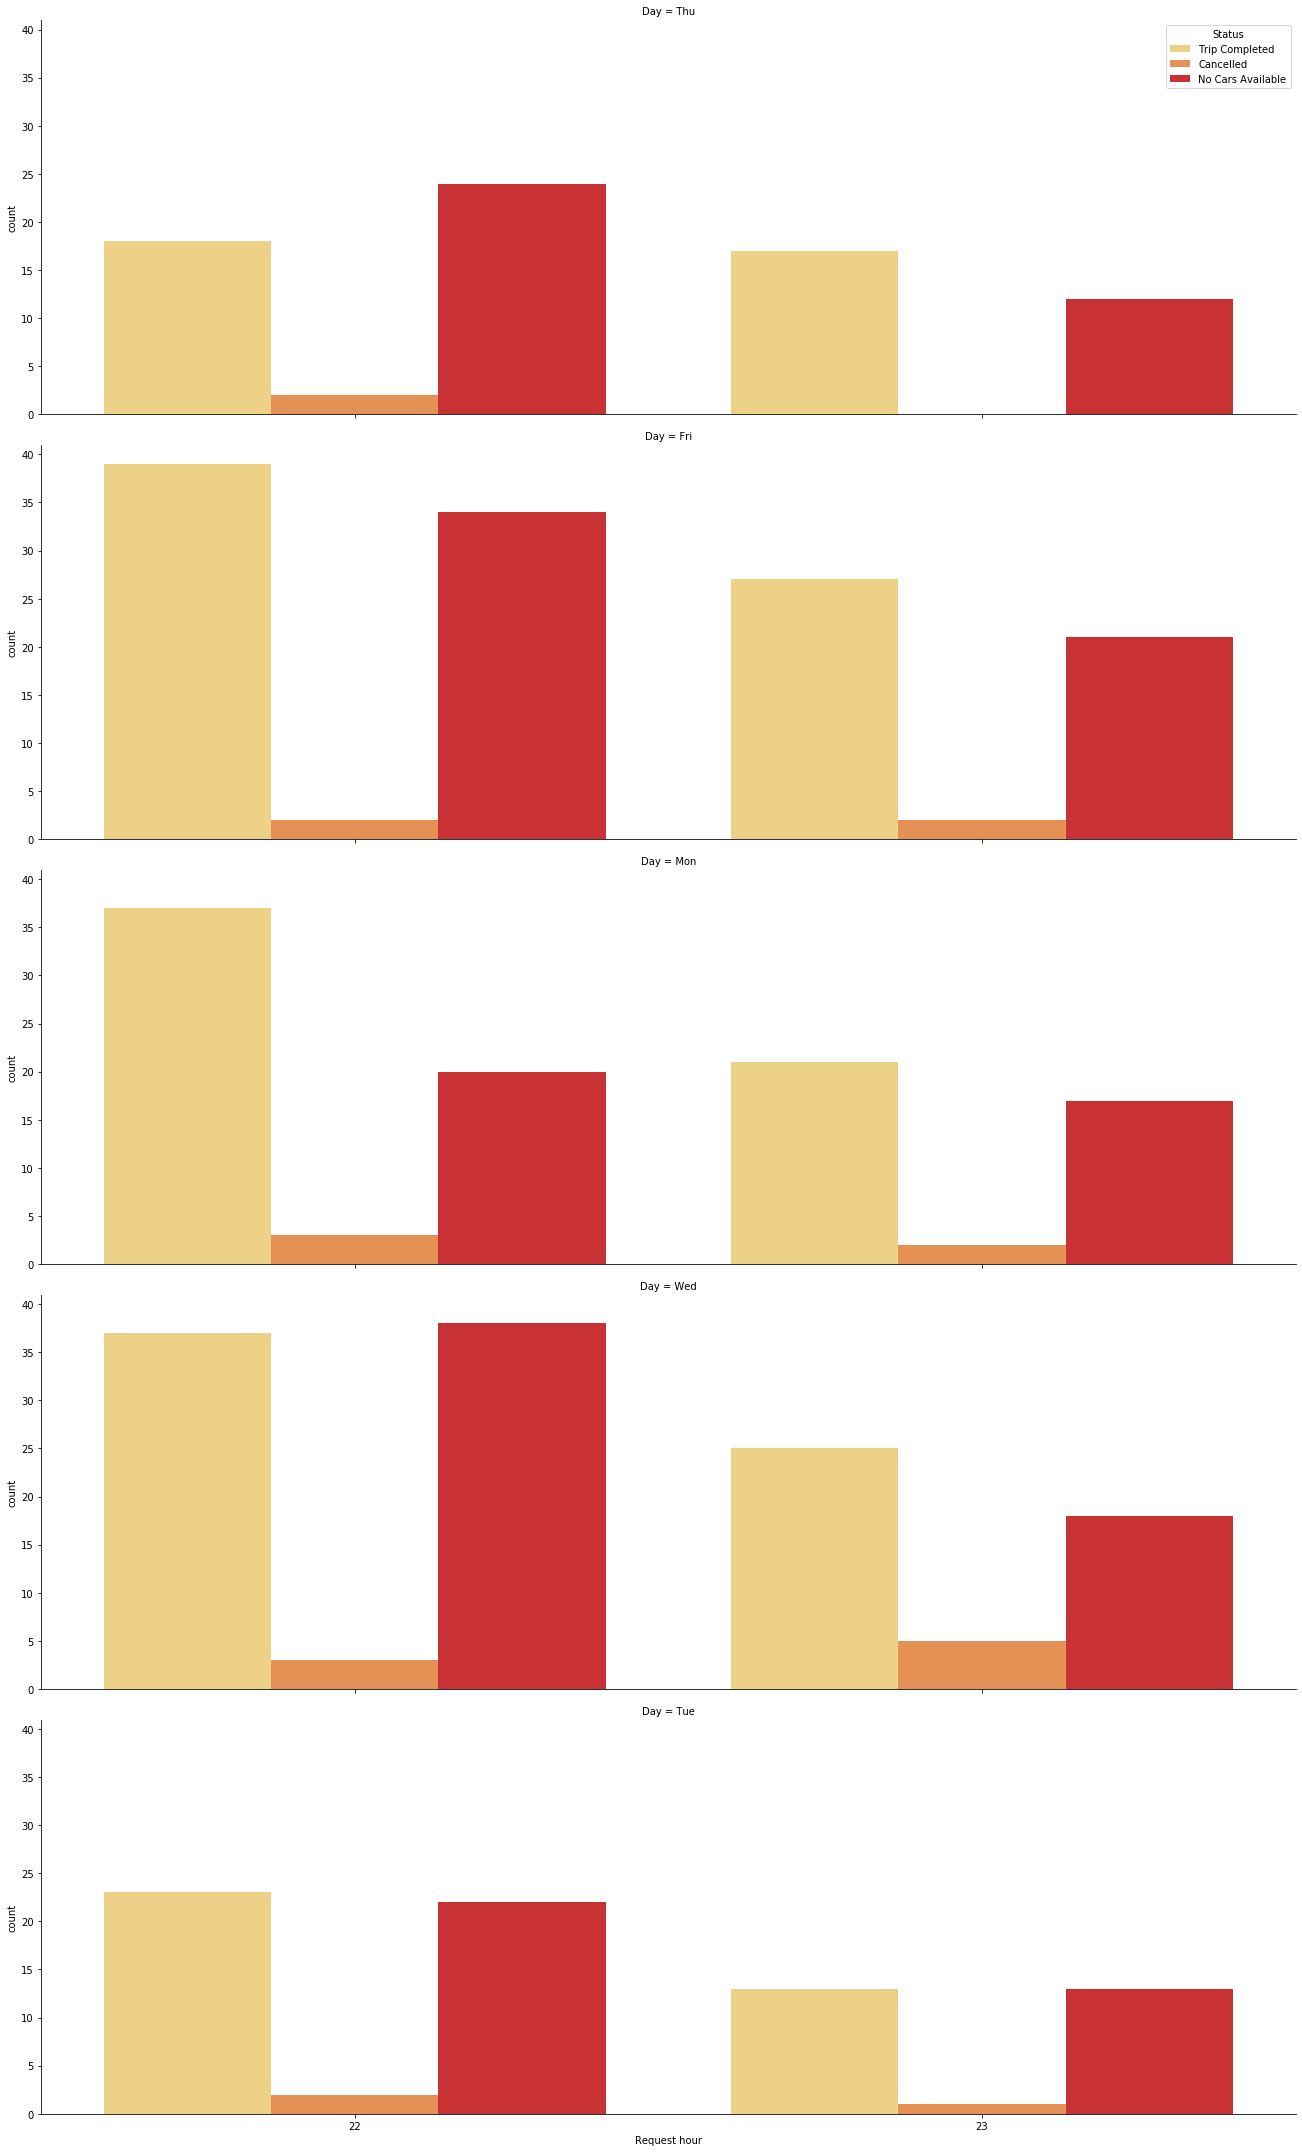

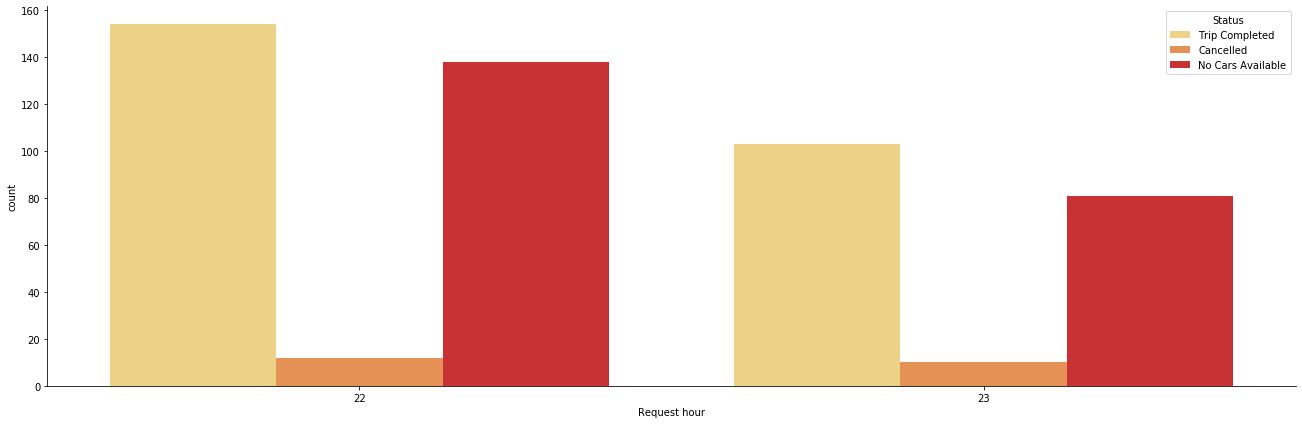

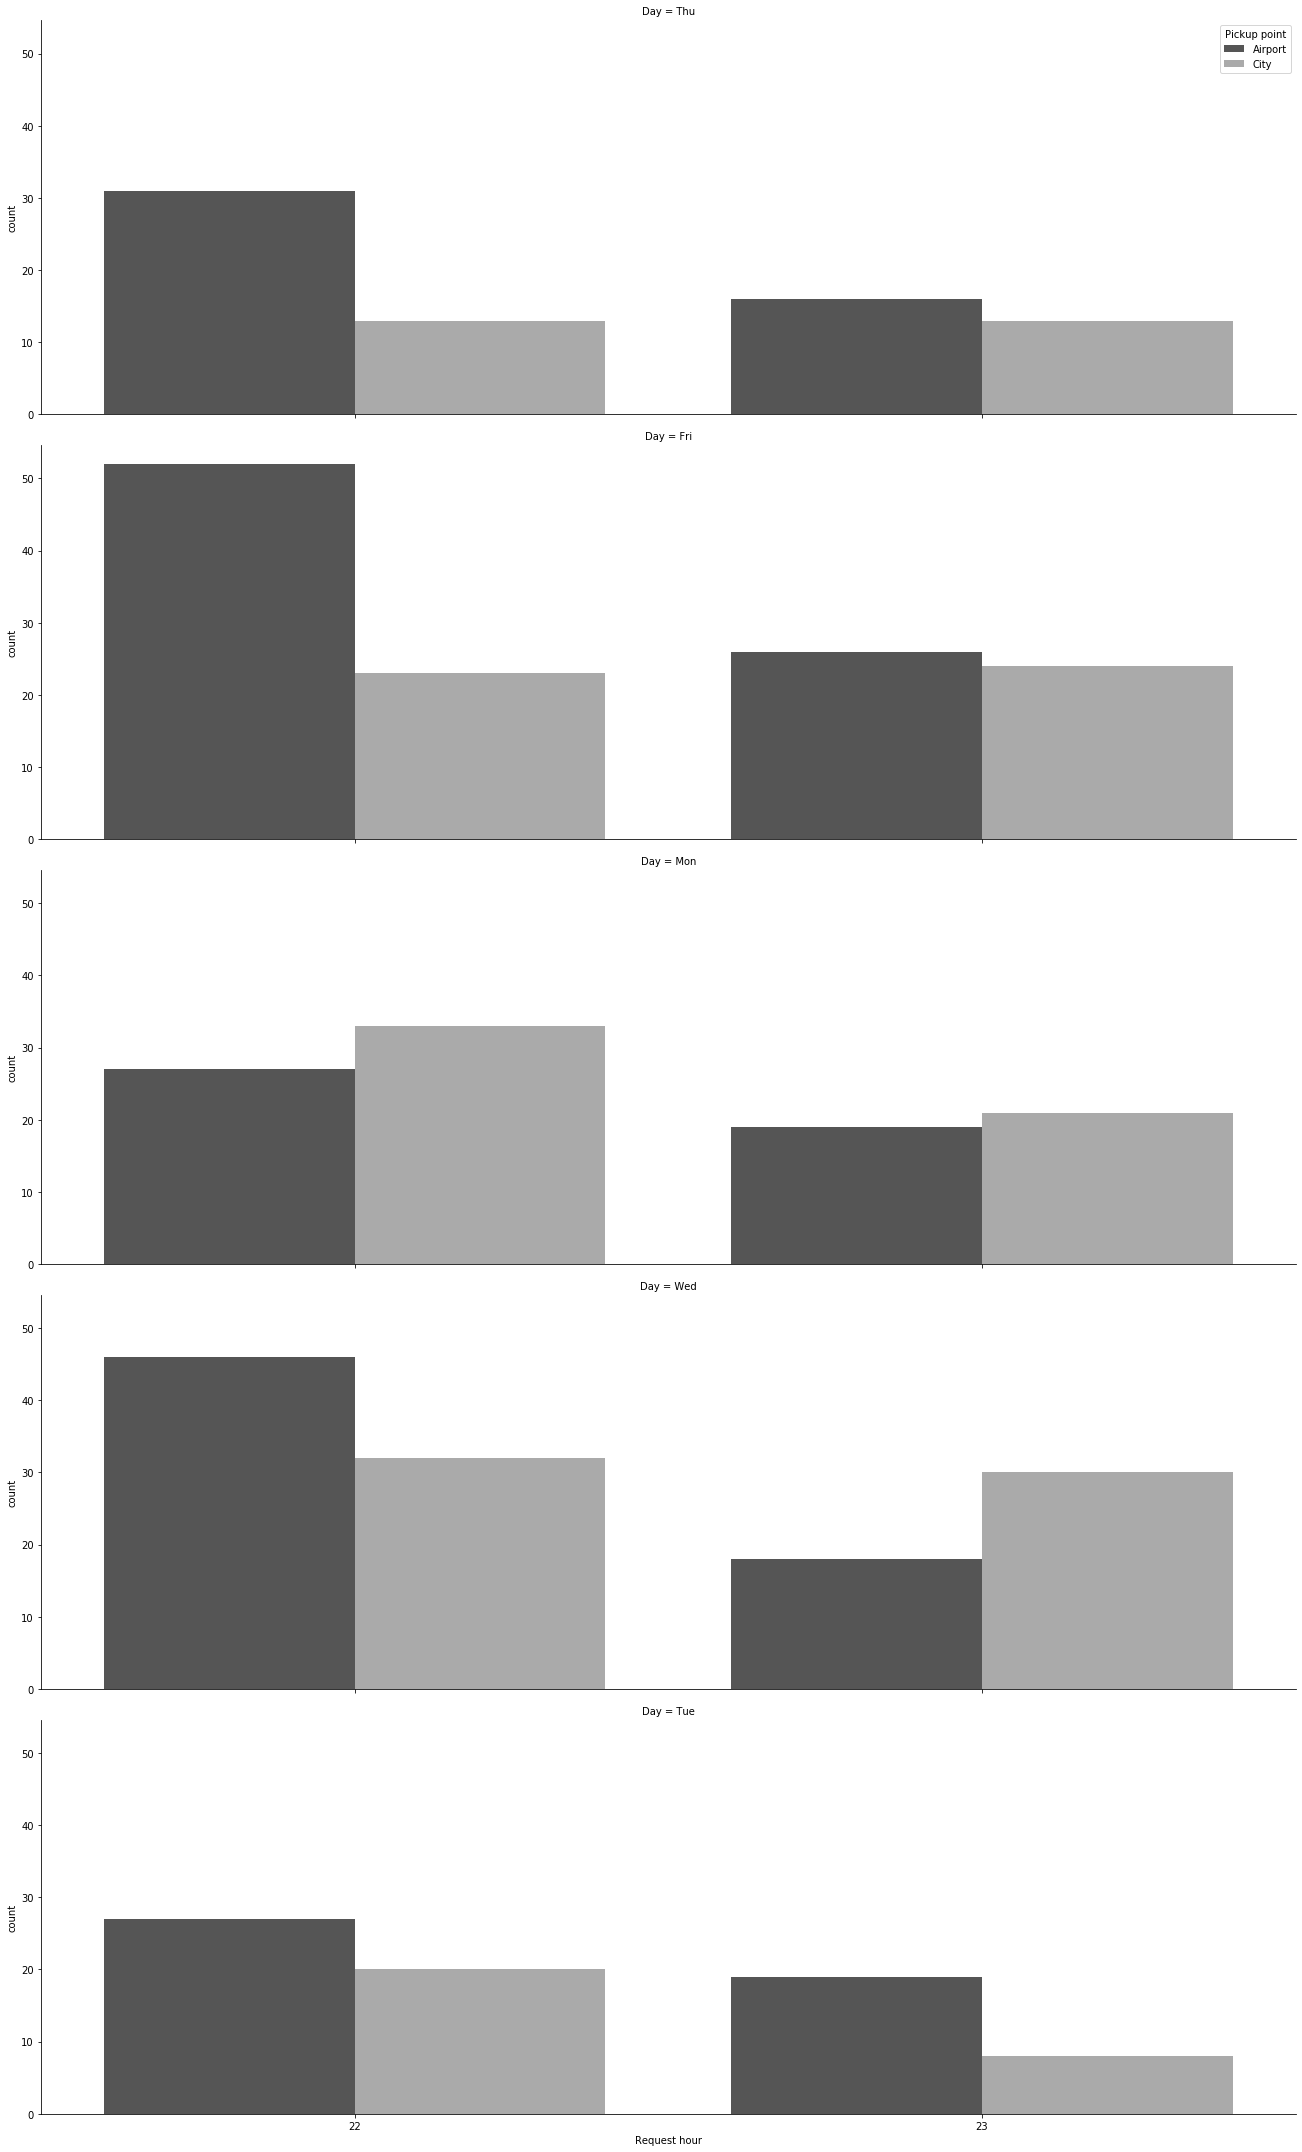

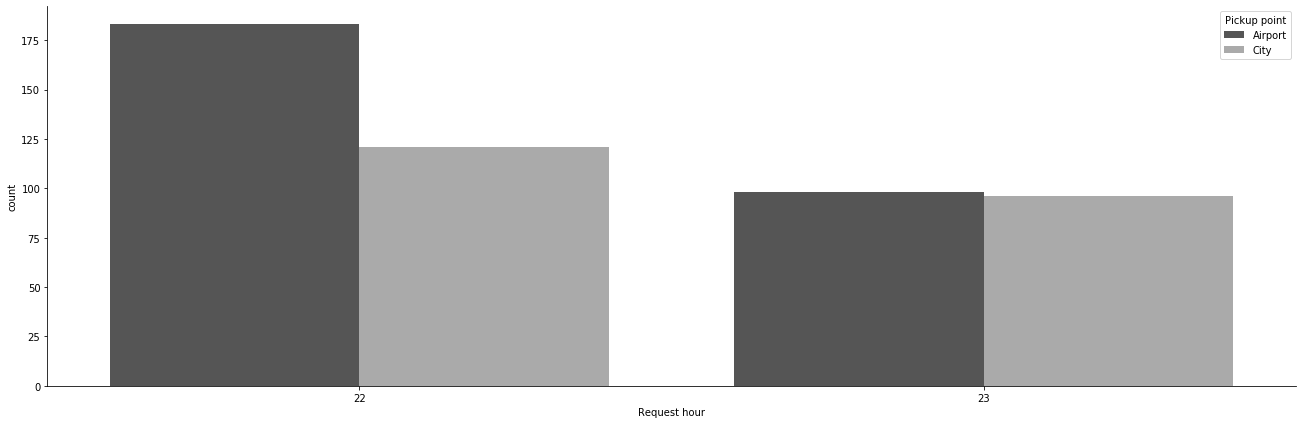

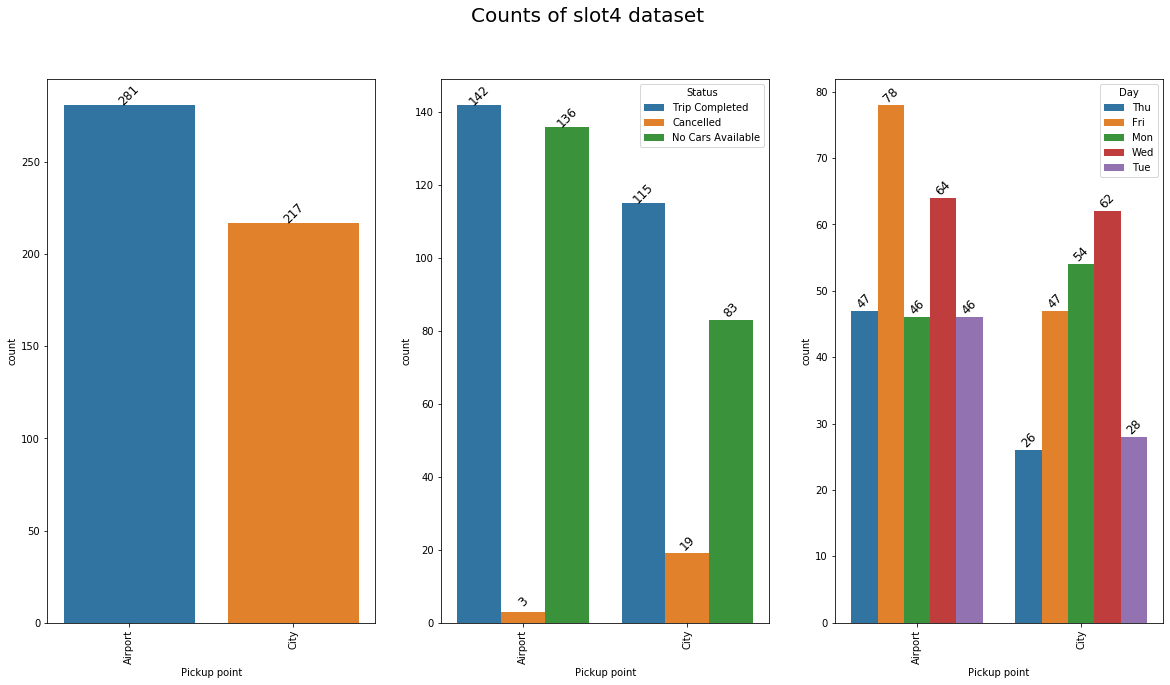

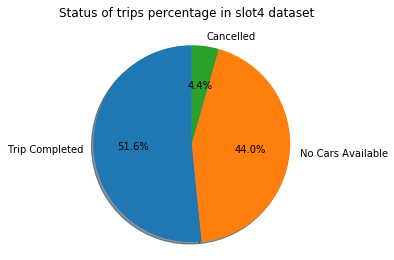

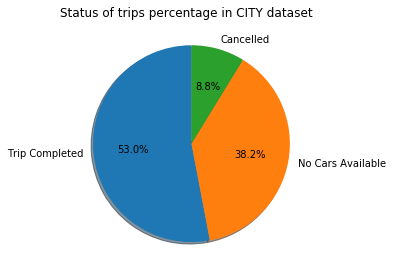

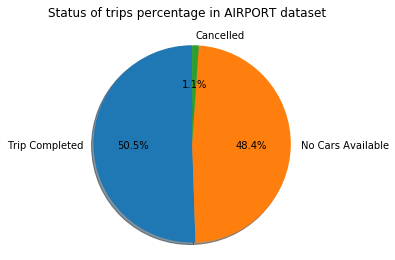

In [10]:
#this function plot shows detailed information of requests on each day and count of requests for each pickup points and for each timeslots
def Visualisation_Plots(df,title,main):
    if main==1:
        print(title)
        factor_plots(df,'Status','YlOrRd')
        factor_plots(df,'Pickup point','gist_gray')
        count_plots(df,'Pickup point',title)
        count_plots(df,'time_slot',title)
        pie_charts(pd.DataFrame(df.Status.value_counts()),title)
        pie_charts(pd.DataFrame(df.loc[(df['Pickup point']=="City")].Status.value_counts()),'CITY')
        pie_charts(pd.DataFrame(df.loc[(df['Pickup point']=="Airport")].Status.value_counts()),'AIRPORT')

    else:
        print(title)
        factor_plots(df,'Status','YlOrRd')
        factor_plots(df,'Pickup point','gist_gray')
        count_plots(df,'Pickup point',title)
        pie_charts(pd.DataFrame(df.Status.value_counts()),title)
        pie_charts(pd.DataFrame(df.loc[(df['Pickup point']=="City")].Status.value_counts()),'CITY')
        pie_charts(pd.DataFrame(df.loc[(df['Pickup point']=="Airport")].Status.value_counts()),'AIRPORT')
Visualisation_Plots(uber_df,'uber_df',1)
Visualisation_Plots(slot0,'slot0',0)
Visualisation_Plots(slot1,'slot1',0)
Visualisation_Plots(slot2,'slot2',0)
Visualisation_Plots(slot3,'slot3',0)
Visualisation_Plots(slot4,'slot4',0)

### Inference : 

- __Original Dataset :__


     1. Count of requests and their status is shown for each hour.Distribution of plot is more or less similar.We shall see some hours have maximum requests in morning and evening hours.We shall see those requests range seperately.
     2. Total number of requests from city to airport is 3507 and from airport to city is 3238.
     3. In airport,number of trips completed is 1327 and number of trips cancelled is 198 and number of trips getting cancelled due to unavailability of cars is 1713.
     4. In city,number of trips completed is 1504 and number of trips cancelled is 1066 and number of trips getting cancelled due to unavailability of cars is 937.
     5. Unavailability of cars is a major problem for the requests from airport to city type of requests.
     6. Number of requests from airport to city is almost the same in all the days and for requests from city to airport the requests are huge during thursday and friday(752).
     7. In total requests only 42% requests has completed the trip where the remaining trips are getting cancelled and cancelled due to unavailability of cars.So Uber should encourage the drivers by paying incentives to work by not getting the requests cancelled and need to invest on cars as there were more requests getting cancelled due to unavailability of it.
     8. Considering the requests from city to airport 43% trips got completed and remaining trips got cancelled due to the fact that cars are unavailable is in high number.
     9. For the requests from airport to city the number of trips completed is 41% and we shall see the trips getting cancelled due to unavailability of cars is 53% which is very high in number. So uber should have a look at this so that they can invest more on cars for the requests between airport to city.
    
    
- __Slot0 Dataset (Early_Morning 1AM to 5AM):__



    1. We shall see that trips are cancelled due to no cars available is huge in number between 1AM to 4AM and many requests trips are completed between 4AM to 5AM for all the working days.
    2. Total number of requests from city to airport is 325 and from airport to city is 253.
    3. Unavailability of cars is high in number in early morning period.
    4. City to airport request is high(88) during thursday and almost same in remaining days for all both types of requests.
    5. More than 50% requests are cancelled due to unavailability of cars and only 37% of trips are completed in early morning.
   

- __Slot1 Dataset (Morning_Peak_hour 5AM to 10AM):__



    1. Comparatively many trips are completed during this time period on all the days except friday where many trips are not completed and the requests are same in each time interval i.e between 5 and 6 and 6 and 7 and so on.
    2. Total number of requests from city to airport is 1677 and from airport to city is 426.We also seen that most of the requests getting cancelled from city to airport(nearly 50%) which should be noted.Since more requests is from city in this slot, we shall allocate more cars to handle this requests from city to airport.
    3. Number of requests on daily basis is almost same in all the days in both types of request.
    4. We shall see that 90% if airport to city trips are completed but only 28% of city to airport requests are completed.So more cars should be available from city to airport during this slot.
   

- __Slot2 Dataset (Normal_Day_hour 10AM to 5PM):__


    1. Generally more trips requests are between 10AM and 1PM and many requests are from city to airport.
    2. Total number of requests from city to airport is 746 and from airport to city is 478.
    3. Most of the trips are completed in this timeslot(more than 65% from airport to city requests) and nearly 60% in overall trips in this timeslot were completed.
    
    
- __Slot3 Dataset (Evening_Peak_hour 5PM to 10PM):__


    1. In this timeslot most of the trips are from airport to city and particularly between 6PM to 7PM and 8PM-9PM range.But on seeing those most of the trips are not completed due to unavailability of cars.
    2. Total number of requests from city to airport is 1800 and from airport to city is 542.We shall see the trend of morning_peak_hour time slot here also that but vice versa in type of requests.In morning_peak_hour time slot most of requests are from city to airport whereas here it is airport to city and mostly cancelled due to unavailability of cars.
    3. It should be made available that many cars shall take requests from airport to city during this time slot.
    4. Nearly 75% of city trips are completed and nearly 70% of trips are not completed from airport to city request which is high in number.So it might lead to loss because we need to make availability of cars more in those areas where the type of request is very high but in our case thats the big issue.During morning hours city request is high but most trips got cancelled and viceversa happens during evening hours which should be noted.
    

- __Slot4 Dataset (Late_Night 10PM to 12AM):__


    1. Requests are almost very less in this time slot.
    2. Total number of requests from city to airport is 217 and from airport to city is 281.
    3. Nearly 50% of trips are completed during this time period.Trips from airport to city in friday is somewhat high comparatively.

#### 4. Supply and Demand Gap : 

- Supply indicates trips between airport to city or city to airport which has been completed i.e status where trips completed.
- Demand indicates trips between airport to city or city to airport which has been cancelled i.e cancelled by drivers or cancelled due to unavailability of cars.

In [11]:
#in this function we mark trip completed as success i.e 1 and trips not completed as failure i.e 0(here cancelled and no cars available)
def supply_demand(df):
    df.Status[df.Status=='Trip Completed']=1
    df.Status[df.Status=='Cancelled']=0
    df.Status[df.Status=='No Cars Available']=0
#storing all datasets in a list and applying the supply_demand function 
datasets=[uber_df,slot0,slot1,slot2,slot3,slot4,uber_city_df,uber_airport_df]
titles=['uber_df','slot0','slot1','slot2','slot3','slot4','uber_city_df','uber_airport_df']
for df in datasets:
    supply_demand(df)

In [12]:
#we shall see the plots of demand which is not fullfilled and supply where trips are completed (demand=total requests ,supply=total trips completed,gap=demand-supply i.e demand not fullfilled here)
def demand_supply_plots(df,title):
    if title=='uber_city_df' or title=='uber_airport_df':
        fig,(ax2)=plt.subplots(ncols=1,figsize=(8,5))
        sns.countplot(x='Status',data=df,ax=ax2)
        ax2.set_ylabel('Count')
        ax2.set_xticklabels( ('Demand_not_fullfilled','Supply'))
    if title!='uber_city_df' and title!='uber_airport_df':
        fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(10,6))
        sns.countplot(x='Status',data=df,ax=ax1)
        ax1.set_ylabel('Count')
        ax1.set_xticklabels( ('Demand_not_fullfilled','Supply'))
        for p in ax1.patches:
            ax1.annotate(format(p.get_height(), ''), (p.get_x() + p.get_width()/2 , p.get_height()), ha = 'center', va = 'center', xytext = (0,10),rotation=0, textcoords = 'offset points',fontsize=12)
    if title!='uber_city_df' and title!='uber_airport_df':
        ax2=sns.countplot(x='Status',hue='Pickup point',data=df,ax=ax2)
        ax2.set_ylabel('Count')
        ax2.set_xticklabels( ('Demand_not_fullfilled','Supply'))
    fig.suptitle('Demand Supply Count plot of '+title+' dataset')
    for p in ax2.patches:
        ax2.annotate(format(p.get_height(), ''), (p.get_x() + p.get_width()/2 , p.get_height()), ha = 'center', va = 'center', xytext = (0,10),rotation=0, textcoords = 'offset points',fontsize=12)

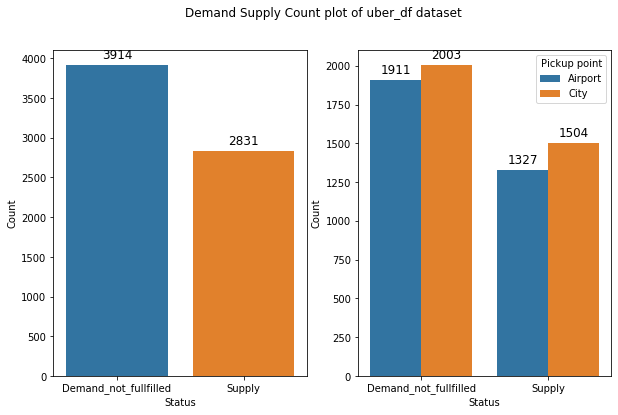

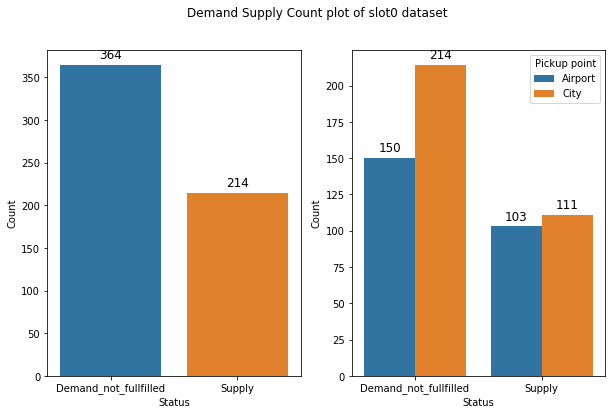

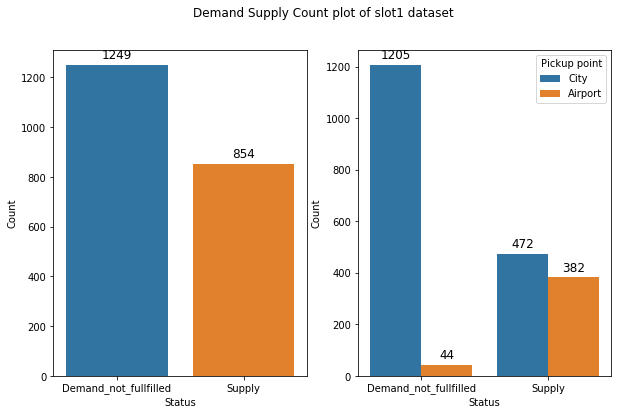

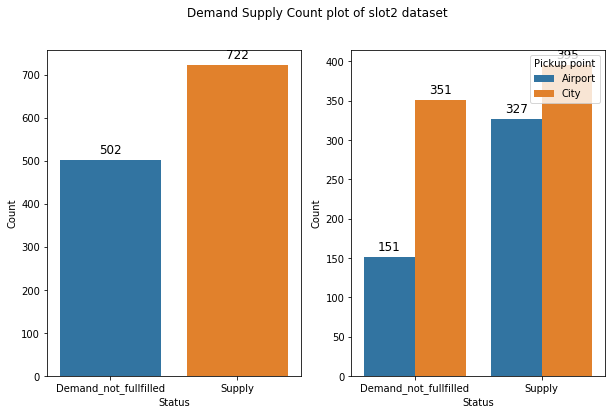

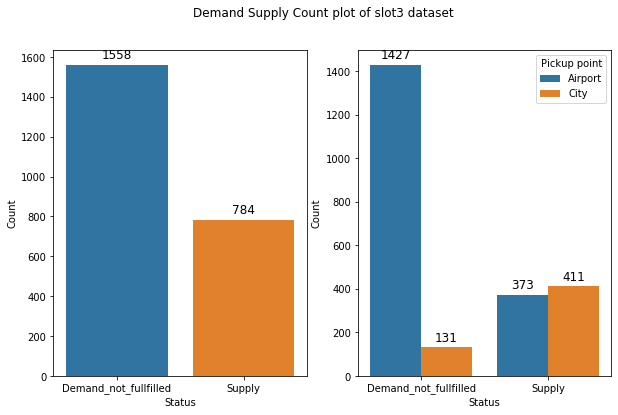

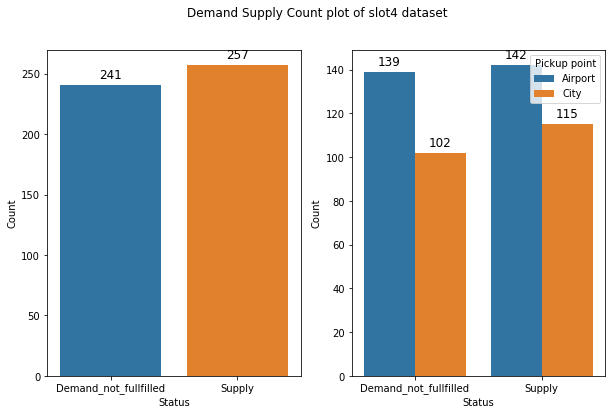

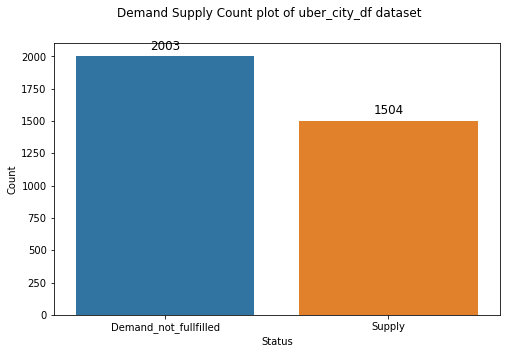

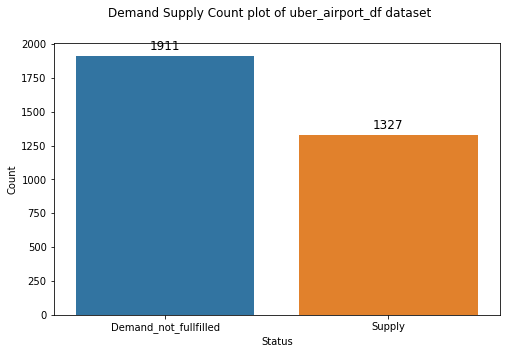

In [13]:
for df,tit in zip(datasets,titles):
    demand_supply_plots(df,tit)

In [14]:
def demand_supply_results(df):
    demand=df['Status'].count()
    supply=df['Status'].sum()
    gap=demand-supply 
    return gap 

def print_gap_results():
    print("These results are displayed in the plot graphically above : \n")
    print("Demand_Supply gap in original dataset : ",demand_supply_results(uber_df))
    print("Demand_Supply gap in slot0 dataset : ",demand_supply_results(slot0))
    print("Demand_Supply gap in slot1 dataset : ",demand_supply_results(slot1))
    print("Demand_Supply gap in slot2 dataset : ",demand_supply_results(slot2))
    print("Demand_Supply gap in slot3 dataset : ",demand_supply_results(slot3))
    print("Demand_Supply gap in slot4 dataset : ",demand_supply_results(slot4))
    print("Demand_Supply gap for the type of request from city to airport :",demand_supply_results(uber_city_df))
    print("Demand_Supply gap for the type of request from airport to city :",demand_supply_results(uber_airport_df))

print_gap_results()

These results are displayed in the plot graphically above : 

Demand_Supply gap in original dataset :  3914
Demand_Supply gap in slot0 dataset :  364
Demand_Supply gap in slot1 dataset :  1249
Demand_Supply gap in slot2 dataset :  502
Demand_Supply gap in slot3 dataset :  1558
Demand_Supply gap in slot4 dataset :  241
Demand_Supply gap for the type of request from city to airport : 2003
Demand_Supply gap for the type of request from airport to city : 1911


__Results__:

   1. Timeslot with the highest gap is slot3 i.e Evening_Peak_hour time period(gap=1558).
   2. Inferred from the plots : 
          i) Slot0-Early_Morning : gap in city to airport requests=214 and gap in airport to city requests=150
          ii) Slot1-Morning_Peak_hour : gap in city to airport requests=1205 and gap in airport to city requests=44
          iii) Slot2-Normal_Day_hour : gap in city to airport requests=351 and gap in airport to city requests=151
          iv) Slot3-Evening_Peak_hour : gap in city to airport requests=132 and gap in airport to city requests=1427
          v) Slot4-Late_Night : gap in city to airport requests=102 and gap in airport to city requests=139
   3. Gap is very high in airport to city requests(1427) in evening peak hour and it is very high in city to airport requests(1205) in morning peak hour.
   
__Recommendations__:

   1. For morning trips from city to airport and for evening trips from airport to city since the gap is very high we could give bonus for each trip during those peak hours.
   2. No cars available generally high in evening time slot which indicates drivers were less during evening time.So uber can recruit more drivers for availability.
   3. One of the best ways shall be uber can allow multiple passengers to share the ride so that lessers cars can serve more passengers request.